# Ideação
## Recomendação para pontos de venda locais
### Pontifícia Universidade Católica de Campinas
#### Breno Coltro da Costa
#### João Roberto Crespi Júnior

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import plotly.express as px

In [2]:
# Breno
vendas = pd.read_excel(io='C:/Users/breno/Desktop/Minhas coisas/PUCC/Segundo Semestre/ABI Academy Hack/Projetos/Ideação/ABIAcademyHack/Venda Cruzada - Venda Adicional/Data.xlsx')

# João Roberto
# vendas = pd.read_excel('Data.xlsx')

In [3]:
vendas.head()

,Unnamed: 0,Doc. Date,Material,Order qty,Ship-to nu,PCS delivered,HL delivered,delivery_days,delivery_flag,lead_time_creation_vs_rdd_flag,...,Container Size,Variétés,Segment LE,Latitude,Longitude,Degre Alc,TTC,Brut + TE,Net + TE - Hors majoration de rompu de palette,DA
0,0,2021-01-11,10946,5.0,29606863,350.0,21.0,7,1,1,...,"6,000 L",Blonde,PREMIUM,50.6455,2.9619,6.6,18.137448,15.582,15.114540,0.0
1,1,2021-01-11,19898,2.0,29606863,140.0,8.4,7,1,1,...,NaN,NaN,NaN,50.6455,2.9619,5.0,17.396467,14.688,14.497056,0.0
2,2,2021-01-11,80176,4.0,29606863,280.0,16.8,7,1,1,...,NaN,NaN,NaN,50.6455,2.9619,0.0,12.279859,10.368,10.233216,0.0
3,3,2021-01-11,66989,1.0,29606863,70.0,4.2,7,1,1,...,"6,000 L",-,SUPER PREMIUM,50.6455,2.9619,8.0,21.996000,18.330,18.330000,0.0
4,4,2021-01-08,11766,70.0,29378784,70.0,4.2,6,1,1,...,NaN,NaN,NaN,50.6978,2.2423,5.2,17.359200,14.466,14.466000,0.0


###### Remoção de colunas

# Análise exploratória

### Clientes [179]

In [ ]:
vendas['Ship-to nu'].value_counts()

29379855    1448
29379651    1253
29595514    1198
29379625    1196
29563495    1181
            ... 
29801344      12
29724733       8
29996996       7
29801553       4
29833190       3
Name: Ship-to nu, Length: 179, dtype: int64

In [ ]:
vendas['Ship-to nu'].value_counts().index  # 179
vendas['Ship-to nu'].value_counts().values.sum()  # 73.670
vendas['Ship-to nu'].value_counts().values

array([1448, 1253, 1198, 1196, 1181, 1149, 1044,  996,  984,  978,  959,
        928,  926,  916,  885,  870,  851,  844,  838,  824,  800,  789,
        788,  779,  767,  732,  715,  708,  700,  697,  693,  678,  670,
        670,  659,  659,  643,  638,  636,  632,  632,  619,  619,  616,
        597,  594,  586,  585,  578,  575,  574,  566,  565,  551,  545,
        538,  519,  498,  498,  496,  481,  474,  471,  467,  464,  461,
        459,  458,  455,  448,  441,  435,  409,  409,  399,  394,  394,
        392,  386,  382,  381,  376,  373,  368,  362,  358,  358,  352,
        351,  351,  349,  347,  345,  344,  333,  328,  319,  316,  316,
        315,  310,  309,  303,  299,  298,  294,  293,  281,  281,  267,
        261,  256,  251,  249,  249,  248,  244,  243,  242,  234,  233,
        232,  230,  223,  216,  216,  209,  207,  201,  200,  198,  191,
        188,  185,  184,  183,  178,  167,  156,  156,  154,  137,  136,
        134,  134,  133,  131,  129,  124,  118,  1

In [ ]:
cumulativoclientes = []

for i in range(len(vendas['Ship-to nu'].value_counts().index)):
    cumulativoclientes.append(vendas['Ship-to nu'].value_counts().array[i] / 73670)
    
for i in range(1, len(vendas['Ship-to nu'].value_counts().index)):
    cumulativoclientes[i] += cumulativoclientes[i - 1]
    
cumulativoclientes

[0.019655219220849736,
 0.03666349938916791,
 0.052925207004207955,
 0.06915976652640152,
 0.08519071535224651,
 0.10078729469254785,
 0.11495859915840913,
 0.12847834939595493,
 0.14183521107642189,
 0.1551106284783494,
 0.16812813899823537,
 0.18072485407900094,
 0.19329442106692002,
 0.20572824759060673,
 0.21774127867517304,
 0.22955069906339076,
 0.24110221256956696,
 0.2525587077507805,
 0.2639337586534546,
 0.27511877290620335,
 0.28597801004479434,
 0.29668793267272975,
 0.3073842812542419,
 0.31795846341794487,
 0.328369757024569,
 0.3383059590063798,
 0.3480114021989955,
 0.3576218270666486,
 0.3671236595629157,
 0.37658476991991313,
 0.3859915840912176,
 0.3951947875661735,
 0.40428939866974345,
 0.4133840097733134,
 0.4223293063662278,
 0.4312746029591421,
 0.44000271480928466,
 0.44866295642731097,
 0.45729604995249085,
 0.46587484729197776,
 0.47445364463146467,
 0.48285597936744945,
 0.49125831410343423,
 0.4996199267001493,
 0.5077236324148229,
 0.5157866159902267,
 0.5

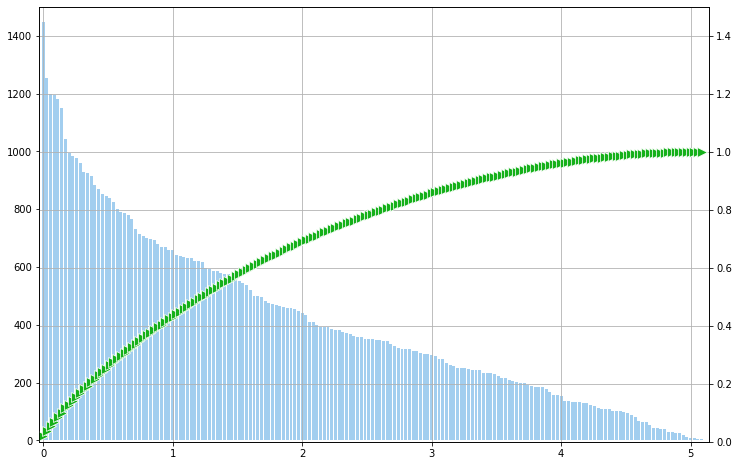

In [ ]:
'''Aprimorar gráfico'''
plt.subplots(figsize=(12, 8))

# Gráfico de barras
sns.barplot(x=list(x for x in range(0, 179)), y=vendas['Ship-to nu'].value_counts().values, color='xkcd:light blue')
plt.xticks([0, 35, 70, 105, 140, 175])
plt.grid(axis='x')
plt.ylim(-5, 1500)
plt.xlim(-1, 180)

# Gráfico cumulativo
plt.twinx()
sns.lineplot(x=list(x for x in range(0, 179)), y=cumulativoclientes, lw=3, color='xkcd:green', marker='>', markersize=10)
plt.ylim(0, 1.5)

# Aprimoração da visualização
plt.grid()

plt.show()

#### Exploração dos vários clientes

In [ ]:
vendas['Sous groupement'].value_counts()
vendas['Sous groupement'].isna().value_counts()  # 827 sem classificação

False    72843
True       827
Name: Sous groupement, dtype: int64

Não consegui identificar quais clientes são on-trade e quais são off-trade pela análise do banco de dados.

### Marcas comercializadas

In [ ]:
vendas.index  # 73.670
vendas.Brand.isna().sum()  # 45.354
vendas.Brand.value_counts().sum()  # 28.316
vendas.Brand.value_counts()  # As dez marcas...

LEFFE               12253
HOEGAARDEN           4514
TRIPLE KARMELIET     3383
KWAK                 2808
BUD                  1901
GOOSE                1324
CORONA               1322
GINETTE               434
CAMDEN                315
BIRRA DEL BORGO        62
Name: Brand, dtype: int64

In [ ]:
vendas.Brand.value_counts() / 28316  # ... em porcentagem

LEFFE               0.432724
HOEGAARDEN          0.159415
TRIPLE KARMELIET    0.119473
KWAK                0.099167
BUD                 0.067135
GOOSE               0.046758
CORONA              0.046687
GINETTE             0.015327
CAMDEN              0.011124
BIRRA DEL BORGO     0.002190
Name: Brand, dtype: float64

In [ ]:
cumulativo = []

for i in range(len(vendas.Brand.value_counts().index)):
    cumulativo.append(vendas.Brand.value_counts()[i] / 28316)
    
for i in range(1, len(vendas.Brand.value_counts().index)):
    cumulativo[i] += cumulativo[i - 1]
    
cumulativo

[0.4327235485238028,
 0.5921387201582144,
 0.7116118095776239,
 0.8107783585252154,
 0.8779135471111739,
 0.9246715637801949,
 0.9713589490040966,
 0.9866859725949992,
 0.9978104252012996,
 1.0]

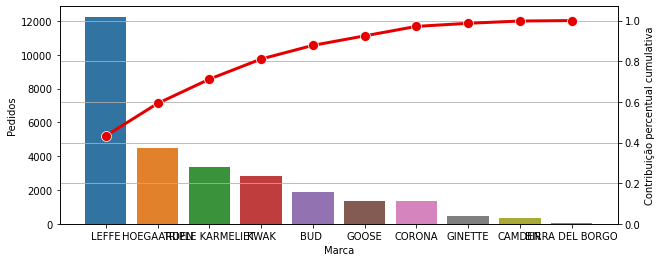

In [ ]:
'''Aprimorar gráfico'''
plt.subplots(figsize=(10, 4))

# Gráfico de barras
sns.barplot(x=vendas.Brand.value_counts().index, y=vendas.Brand.value_counts())
plt.xlabel("Marca")
plt.ylabel("Pedidos")

# Gráfico de linha cumulativa de vendas
plt.twinx()
sns.lineplot(x=vendas.Brand.value_counts().index, y=cumulativo, lw=3, color='xkcd:red', marker='o', markersize=10)
plt.ylim(0, 1.07)
plt.ylabel("Contribuição percentual cumulativa")

# Aprimoração da visualização
plt.grid()

plt.show()

#### Submarcas

In [ ]:
vendas.Brand.value_counts()

LEFFE               12253
HOEGAARDEN           4514
TRIPLE KARMELIET     3383
KWAK                 2808
BUD                  1901
GOOSE                1324
CORONA               1322
GINETTE               434
CAMDEN                315
BIRRA DEL BORGO        62
Name: Brand, dtype: int64

In [ ]:
vendas.Subrand.loc[vendas.Brand == 'LEFFE'].value_counts()

LEFFE BLONDE        4784
LEFFE RUBY          2661
LEFFE ROYALE        2179
LEFFE RITUEL 9°      881
LEFFE BRUNE          706
LEFFE AMBREE         511
LEFFE BLONDE 0,0     301
LEFFE LA LEGERE      202
LEFFE TRIPLE          28
Name: Subrand, dtype: int64

In [ ]:
vendas.Subrand.loc[vendas.Brand == 'HOEGAARDEN'].value_counts()

HOEGAARDEN WHITE        3171
HOEGAARDEN ROSEE        1251
HOEGAARDEN GRAND CRU      92
Name: Subrand, dtype: int64

In [ ]:
vendas.Subrand.loc[vendas.Brand == 'TRIPLE KARMELIET'].value_counts()

TRIPLE KARMELIET    3383
Name: Subrand, dtype: int64

In [ ]:
vendas.Subrand.loc[vendas.Brand == 'KWAK'].value_counts()

KWAK    2808
Name: Subrand, dtype: int64

In [ ]:
vendas.Subrand.loc[vendas.Brand == 'BUD'].value_counts()

Series([], Name: Subrand, dtype: int64)

In [ ]:
vendas.Subrand.loc[vendas.Brand == 'GOOSE'].value_counts()

GOOSE    1324
Name: Subrand, dtype: int64

In [ ]:
vendas.Subrand.loc[vendas.Brand == 'CORONA'].value_counts()

CORONA EXTRA    1322
Name: Subrand, dtype: int64

In [ ]:
vendas.Subrand.loc[vendas.Brand == 'GINETTE'].value_counts()

GINETTE LAGER      189
GINETTE BLANCHE    120
GINETTE FRUIT       89
GINETTE TRIPLE      31
GINETTE BLONDE       5
Name: Subrand, dtype: int64

In [ ]:
vendas.Subrand.loc[vendas.Brand == 'CAMDEN'].value_counts()

CAMDEN PALE ALE    247
CAMDEN HELLS        68
Name: Subrand, dtype: int64

In [ ]:
vendas.Subrand.loc[vendas.Brand == 'BIRRA DEL BORGO'].value_counts()

BIRRA DEL BORGO    62
Name: Subrand, dtype: int64

## Volume da embalagem

In [ ]:
vendas['Container Size'].isna().value_counts()  # 28.316 contém volume, enquanto 45.354, não.
vendas['Container Size'].value_counts()

'''Quantidade de pedidos em que aparecem:
Pedidos = 28.316
   6 l 19.775  0,6984
330 ml 6.657   0,2351
355 ml 1.627   0,0575'''

'Quantidade de pedidos em que aparecem:\nPedidos = 28.316\n   6 l 19.775  0,6984\n330 ml 6.657   0,2351\n355 ml 1.627   0,0575'

In [ ]:
vendas['Order qty'].loc[vendas.Brand.isna() == False].sum()  # 1743298.37
vendas['Order qty'].loc[vendas['Container Size'] == '6,000 L'].sum()  # 1460659.21
vendas['Order qty'].loc[vendas['Container Size'] == '0,330 L'].sum()  # 174620.56
vendas['Order qty'].loc[vendas['Container Size'] == '0,355 L'].sum()  # 80056.48

'''Quantidade absoluta de ordens pedidas dessas embalagens:
Ordens com marcas = 1.743.298
   6 l 1.460.659 0,8379
330 ml   174.620 0,1002
355 ml    80.056 0,0459'''

'Quantidade absoluta de ordens pedidas dessas embalagens:\nOrdens com marcas = 1.743.298\n   6 l 1.460.659 0,8379\n330 ml   174.620 0,1002\n355 ml    80.056 0,0459'

In [ ]:
vendas['PCS delivered'].loc[vendas.Brand.isna() == False].sum()  # 2963643.972
vendas['PCS delivered'].loc[vendas['Container Size'] == '6,000 L'].sum()  # 2466966.81
vendas['PCS delivered'].loc[vendas['Container Size'] == '0,330 L'].sum()  # 296084.56
vendas['PCS delivered'].loc[vendas['Container Size'] == '0,355 L'].sum()  # 147494.479


147494.47999999998

##  Distribuição do material

In [ ]:
vendas.Material.value_counts(ascending=True)

18692       1
71275       1
65716       1
3643        1
81411       1
         ... 
19898    2607
9974     2666
3372     2954
10946    3562
11574    3562
Name: Material, Length: 179, dtype: int64

'O gráfico mostra a distribuição de frequência de materiais. Assim, dois materiais giram em torno de 3.500, enquanto mais de 100 aparecem até 100 vezes.'

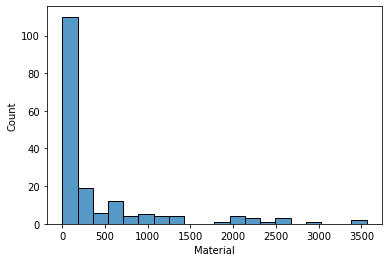

In [ ]:
sns.histplot(x=vendas.Material.value_counts())

plt.plot()

'''O gráfico mostra a distribuição de frequência de materiais. Assim, dois materiais giram em torno de 3.500, enquanto mais de 100 aparecem até 100 vezes.'''

In [ ]:
vendas.Material.loc[vendas.Brand == "LEFFE"].value_counts()

'''LEFFE
LEFFE BLONDE
10946    6l 3562
3337  330ml 1171
LEFFE RUBY
20614    6l 2118
30822 330ml  513
LEFFE ROYALE
48537    6l 1338 Whitbread Golding
53566    6l  724 IPA
LEFFE RITUEL 9°
17028    6l  849
LEFFE BRUNE
10611    6l  706
LEFFE AMBREE
64665    6L  511'''

'LEFFE\nLEFFE BLONDE\n10946    6l 3562\n3337  330ml 1171\nLEFFE RUBY\n20614    6l 2118\n30822 330ml  513\nLEFFE ROYALE\n48537    6l 1338 Whitbread Golding\n53566    6l  724 IPA\nLEFFE RITUEL 9°\n17028    6l  849\nLEFFE BRUNE\n10611    6l  706\nLEFFE AMBREE\n64665    6L  511'

In [ ]:
vendas.Material.loc[vendas.Brand == "HOEGAARDEN"].value_counts()

'''HOEGAARDEN
HOEGAARDEN WHITE
10947    6l 2185
10957 330ml  960
HOEGAARDEN ROSEE
33335    6l 1251'''

'HOEGAARDEN\nHOEGAARDEN WHITE\n10947    6l 2185\n10957 330ml  960\nHOEGAARDEN ROSEE\n33335    6l 1251'

In [ ]:
vendas.Material.loc[vendas.Brand == "TRIPLE KARMELIET"].value_counts()

'''TRIPLE KARMELIET
66989    6l 2020
59874 330ml 1262'''

'TRIPLE KARMELIET\n66989    6l 2020\n59874 330ml 1262'

In [ ]:
# Marca
vendas.Material.loc[vendas.Brand == "KWAK"].value_counts()

'''KWAK
61629    6l 1882
59873 330ml  841'''

'KWAK\n61629    6l 1882\n59873 330ml  841'

In [ ]:
# "Submarca" BUD
vendas.Material.loc[vendas.Subrand == "BUD"].value_counts()

'''BUD
71316    6l 1095
77589 330ml  538'''

'BUD\n71316    6l 1095\n77589 330ml  538'

In [ ]:
# Marca
vendas.Material.loc[vendas.Brand == "GOOSE"].value_counts()

'''GOOSE
70601    6l 1003
63445 330ml  264'''

'GOOSE\n70601    6l 1003\n63445 330ml  264'

In [ ]:
# Marca
vendas.Material.loc[vendas.Brand == "CORONA"].value_counts()

'''CORONA
CORONA EXTRA
77313 355ml 695 MACO <
54232 355ml 609 MACO >'''

'CORONA\nCORONA EXTRA\n77313 355ml 695 MACO <\n54232 355ml 609 MACO >'

In [ ]:
# Marca
vendas.Material.loc[vendas.Brand == "GINETTE"].value_counts()

'''GINETTE
GINETTE LAGER
74342    6l 146
74529 330ml  43
GINETTE BLANCHE
81408    6L 54
76828 330ml 60
GINETTE FRUIT
81410    6l 50
76952 330ml 40
GINETTE TRIPLE
59942 330ml 31'''

'GINETTE\nGINETTE LAGER\n74342    6l 146\n74529 330ml  43\nGINETTE BLANCHE\n81408    6L 54\n76828 330ml 60\nGINETTE FRUIT\n81410    6l 50\n76952 330ml 40\nGINETTE TRIPLE\n59942 330ml 31'

In [ ]:
# Marca
vendas.Material.loc[vendas.Brand == "CAMDEN"].value_counts()

'''CAMDEN
CAMDEN PALE ALE
64601 330ml 247 (inclui 79923)
CAMDEN HELLSs
64590 330ml 68 (inclui 79894)'''

'CAMDEN\nCAMDEN PALE ALE\n64601 330ml 247 (inclui 79923)\nCAMDEN HELLSs\n64590 330ml 68 (inclui 79894)'

In [ ]:
# Marca
vendas.Material.loc[vendas.Brand == "BIRRA DEL BORGO"].value_counts()

'''BIRRA DEL BORGO
70605    6l 62'''

'BIRRA DEL BORGO\n70605    6l 62'

In [ ]:
vendas.loc[vendas.Material == 77313].head()

,Unnamed: 0,Doc. Date,Material,Order qty,Ship-to nu,PCS delivered,HL delivered,delivery_days,delivery_flag,lead_time_creation_vs_rdd_flag,MACO/HL,Groupement,Postal Code,Street,Sous groupement,M2_Territory_ID,M1_Territory_ID,Dépt,Brand,Subrand,SEGMENTS : Pils / Spécialités / Superspécialités/Bouteille Young adult,Container Type,Container Size,Variétés,Segment LE,Latitude,Longitude,Degre Alc,TTC,Brut + TE,Net + TE - Hors majoration de rompu de palette,DA
1135,1135,2020-07-01,77313,2.0,29379619,120.0,10.2240,6,1,1,128.525559,C10,34200,Z I LES EAUX BLANCHES,FOUILLADE LUCIEN,FR01_ON_6000,FR01_ON_6005,34.0,CORONA,CORONA EXTRA,Bouteille Young Adult,BOTTLE VP - Tendances,"0,355 L",Corona,SUPER PREMIUM,43.4018,3.6966,4.5,24.992208,27.72,20.706840,0.12
1252,1252,2020-07-01,77313,1.0,29379360,60.0,5.1120,5,1,0,128.525559,C10,33260,AVENUE GUSTAVE EIFFEL,LE BIHAN,FR01_ON_1200,FR01_ON_1203,33.0,CORONA,CORONA EXTRA,Bouteille Young Adult,BOTTLE VP - Tendances,"0,355 L",Corona,SUPER PREMIUM,44.6287,-1.1406,4.5,24.992208,27.72,20.706840,0.12
1316,1316,2020-07-01,77313,10.0,29379641,10.0,0.8520,6,1,1,128.525559,DISTRIBOISSONS,59199,PLACE DU 4 SEPTEMBRE,COUPEZ JEAN,FR01_ON_1000,FR01_ON_1002,59.0,CORONA,CORONA EXTRA,Bouteille Young Adult,BOTTLE VP - Tendances,"0,355 L",Corona,SUPER PREMIUM,50.4660,3.5001,4.5,26.309462,27.72,21.804552,0.12
1351,1351,2020-07-01,77313,120.0,29431121,0.0,0.0000,7,0,1,128.525559,INDEPENDANTS,94500,RUE BENOIT FRANCHON,UNIVERS DES BOISSONS ARTISANALES,FR01_ON_8000,FR01_ON_8004,94.0,CORONA,CORONA EXTRA,Bouteille Young Adult,BOTTLE VP - Tendances,"0,355 L",Corona,SUPER PREMIUM,48.8164,2.4937,4.5,33.408000,27.72,27.720000,0.12
1421,1421,2020-07-01,77313,18.0,29379667,18.0,1.5336,6,1,1,128.525559,C10,22203,PLOUISY,COZIGOU,FR01_ON_1100,FR01_ON_1102,22.0,CORONA,CORONA EXTRA,Bouteille Young Adult,BOTTLE VP - Tendances,"0,355 L",Corona,SUPER PREMIUM,NaN,NaN,4.5,24.992208,27.72,20.706840,0.12


###### Processo repetitivo de verificação de materiais de cada marca e submarca

In [ ]:
# Marca
vendas.Material.loc[vendas.Brand == "GINETTE"].value_counts()


74342    146
81408     54
81410     50
74529     43
76828     40
59942     31
76952     20
75909     18
59940     18
59941      7
59939      5
81411      1
81409      1
Name: Material, dtype: int64

In [ ]:
# Submarca, quando há
vendas.Material.loc[vendas.Subrand == "LEFFE BLONDE 0,0"].value_counts()

77721    298
69490      3
Name: Material, dtype: int64

In [ ]:
# Volume do recipiente
print(vendas['Container Size'].loc[vendas.Material == 77721].value_counts())
# Nome da linha
vendas.Subrand.loc[vendas.Material == 77721].value_counts()

0,330 L    298
Name: Container Size, dtype: int64


LEFFE BLONDE 0,0    298
Name: Subrand, dtype: int64

## Volume por pedido

In [ ]:
vendas['Order qty'].sort_values(axis=0).value_counts(sort=False)  # 256 quantidades diferentes, algumas não-inteiras

1.00      8457
2.00      3691
8.00      1580
32.00      702
64.00      404
          ... 
1.82        42
765.00       3
170.00       5
624.00      75
540.00       3
Name: Order qty, Length: 256, dtype: int64

In [ ]:
# Agrupamento
## Índice
list(vendas['Order qty'].sort_values(axis=0).value_counts(sort=False).index)  # [0-14] < 2 e 2 <= [15-16] < 3

### A partir daqui, apenas quantidades inteiras
volumeindex = list(vendas['Order qty'].sort_values(axis=0).value_counts(sort=False).index)[17:]
volumeindex.insert(0, 2.0)
volumeindex.insert(0, 1.0)
volumeindex  # 241

'''Índice corrigido do número de ordens constantes no dataset (supressão de valores quebrados tais como 1.1 ordens) = 241 ordens diferentes'''

'Índice corrigido do número de ordens constantes no dataset (supressão de valores quebrados tais como 1.1 ordens) = 241 ordens diferentes'

In [ ]:
## Conteúdo
volumevalores = list(vendas['Order qty'].sort_values(axis=0).value_counts(sort=False).values)[17:]  # De 3 ordens em diante
volumevalores.insert(0, 3693)  # Duas ordens: [15:17] = [3691, 2]
volumevalores.insert(0, 8468)  # Uma ordem: [:15] = [8457, 2, 4, 1, 3, 7, 3, 2, 1, 2, 1, 1, 1, 42, 1]
volumevalores

'''Valores corrigidos do número de vezes que cada quantidade de ordem ocorre a fim de ser compatível como "volumeindex"; e.g. volumevalores[0] = 8468, correspondendo a uma ordem'''

'Valores corrigidos do número de vezes que cada quantidade de ordem ocorre a fim de ser compatível como "volumeindex"; e.g. volumevalores[0] = 8468, correspondendo a uma ordem'

In [ ]:
## Volume absoluto
volumeabsoluto = list(np.array(volumeindex) * np.array(volumevalores))  # Quantidade de ordens vezes o número de aparições da mesma
volumeabsoluto

'''Uma ordem em um pedido ocorre 8.468 vezes (1 * 8468), enquanto duas ordens em um pedido, 3.693 vezes, resultando em 7.386 ordens.'''

'Uma ordem em um pedido ocorre 8.468 vezes (1 * 8468), enquanto duas ordens em um pedido, 3.693 vezes, resultando em 7.386 ordens.'

In [ ]:
## Total para calcular porcentagem
total = 0

for valor in volumeabsoluto:
    total += valor

total  # 4.220.713

'''Somatório do total de ordens (1 * 8468 + 2 * 3693 + 3 * 2692 + ...) = 4.220.713'''

'Somatório do total de ordens (1 * 8468 + 2 * 3693 + 3 * 2692 + ...) = 4.220.713'

In [ ]:
## Cumulação do volume absoluto dos pedidos
cumulativopedidos = []

for i in range(len(volumeabsoluto)):
    cumulativopedidos.append(volumeabsoluto[i] / total)  # Quantidade de ordens dividida pelo total da mesma
    
for i in range(1, len(volumeabsoluto)):
    cumulativopedidos[i] += cumulativopedidos[i - 1]  # Contribuição percentual cumulativa de cada quantidade de ordem
    # e.g. pedidos de uma ordem contribuem 0.0021% do total de ordens
    
cumulativopedidos

[0.002067278675355556,
 0.00387041050060073,
 0.0038714358395752807,
 0.004036222460485177,
 0.004335279661395729,
 0.008597760255598375,
 0.008746190278580918,
 0.008767185314726474,
 0.008847747662726868,
 0.009069904440546134,
 0.013995925828279295,
 0.01467557909140989,
 0.016265342758617657,
 0.01667157229520146,
 0.017115885850839993,
 0.01743325267629609,
 0.01794103959702584,
 0.01822178717339085,
 0.018602627363938164,
 0.022214750094283087,
 0.02625165611408463,
 0.03303842361229961,
 0.03970312694687763,
 0.0438923690428981,
 0.05166785626657246,
 0.08676862716201669,
 0.08718755137161874,
 0.10452310389133981,
 0.10458657725643103,
 0.11385564158636723,
 0.1178398158874776,
 0.11918447471410236,
 0.11932704565723033,
 0.12022934395483474,
 0.12026962512883493,
 0.12029794401479871,
 0.12474498562442043,
 0.12518441661351348,
 0.1253772779920599,
 0.1255017834389696,
 0.12554987671944254,
 0.1256194532927156,
 0.1256521664885703,
 0.12613016975337263,
 0.12615262955948184,
 

In [ ]:
## Total de pedidos
volumetotal = 0

for valor in volumevalores:  # Frequência de uma quantidade de ordens
    volumetotal += valor

volumetotal  # total de pedidos realizados: 73.610 (deveria ser 73.670 por não haver NA)

'''Frequência arredondada de ordens, computadas em "volumevalores", não correspondem ao número de pedidos (73.610 versus 73.670)'''

'Frequência arredondada de ordens, computadas em "volumevalores", não correspondem ao número de pedidos (73.610 versus 73.670)'

In [ ]:
## Cumulação da quantidade de pedidos
cumulativolume = []

for i in range(len(volumevalores)):
    cumulativolume.append(volumevalores[i] / volumetotal)  # Quantidade de pedidos dividido pelo total de pedidos;
    # e.g. {1:8468} / 73610
    
for i in range(1, len(volumevalores)):
    cumulativolume[i] += cumulativolume[i - 1]  # Contribuição percentual acumulada da frequência dos pedidos;
    # e.g. pedidos com uma ordem correspondem a 11.50% dos pedidos
    
cumulativolume

[0.11963493543556271,
 0.1718092170325789,
 0.17183747280382017,
 0.17187985646068207,
 0.17257212285609333,
 0.1739425277612952,
 0.17395665564691584,
 0.17397078353253648,
 0.1739849114181571,
 0.17408380661750159,
 0.1899211663982368,
 0.19009070102568446,
 0.19061343279364806,
 0.19064168856488933,
 0.1907405837642338,
 0.19075471164985444,
 0.1907829674210957,
 0.19085360684919891,
 0.19088186262044018,
 0.194752903280495,
 0.19550168121838882,
 0.1974654573196575,
 0.1978327823457941,
 0.1979881890876211,
 0.19848266508434345,
 0.19959876804837384,
 0.20033341810064703,
 0.3006555338927976,
 0.3007261733209008,
 0.31030487977169335,
 0.3110254019383459,
 0.3111525529089316,
 0.3111666807945523,
 0.31126557599389676,
 0.3112797038795174,
 0.31133621542199996,
 0.312311039529824,
 0.31233929530106525,
 0.3123534231866859,
 0.3124240626147891,
 0.3124381905004098,
 0.3124805741572717,
 0.31249470204289237,
 0.31375208386312914,
 0.3137662117487498,
 0.315631092650674,
 0.31604080133

### Gráfico de volume de pedidos

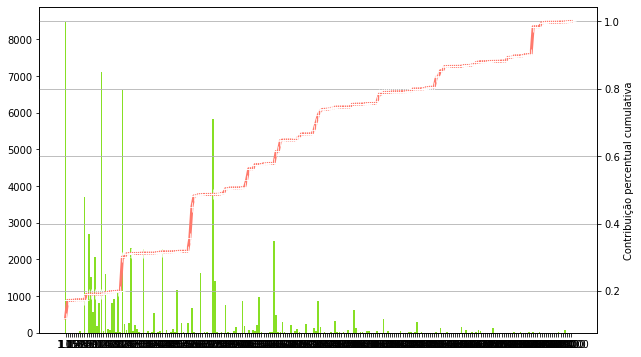

In [ ]:
'''Aprimorar gráfico'''
plt.subplots(figsize=(10, 6))

# Gráfico de barras
sns.barplot(x=volumeindex, y=volumevalores, color='xkcd:lime green')

# Gráfico de linha
plt.twinx()
sns.lineplot(x=list(x for x in range(len(volumeindex))), y=cumulativolume, lw=3, color='xkcd:salmon', marker='+', markersize=10)
plt.ylabel("Contribuição percentual cumulativa")

# Aprimoração da visualização
plt.grid()

plt.show()

### Gráfico de volume absoluto

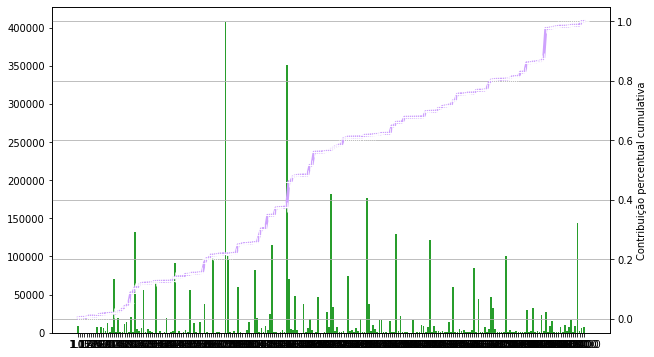

In [ ]:
'''Aprimorar gráfico'''
plt.subplots(figsize=(10, 6))

# Gráfico de barras
sns.barplot(x=volumeindex, y=volumeabsoluto, color='xkcd:green')

# Gráfico de linha
plt.twinx()
sns.lineplot(x=list(x for x in range(len(volumeindex))), y=cumulativopedidos, lw=3, color='xkcd:lilac', marker='+', markersize=10)
plt.ylabel("Contribuição percentual cumulativa")

# Aprimoração da visualização
plt.grid()

plt.show()

### Análise comparativa da "Quantidade da Ordem" das "Peças Entregues"

In [ ]:
proporcao = pd.Series(np.array(vendas['PCS delivered']) / np.array(vendas['Order qty']))
proporcao  # Proporção de peças entregues por ordem de cada pedido (linha)

0        70.0
1        70.0
2        70.0
3        70.0
4         1.0
         ... 
73665    70.0
73666    70.0
73667    70.0
73668    70.0
73669    70.0
Length: 73670, dtype: float64

In [ ]:
proporcao.value_counts(ascending=True).values  # Contagem das proporções existentes.
# Das 95 proporções, apenas 17 estão acima de 10, apenas 12 estão acima de 100, e apenas 7 estão acima de 1000.

array([    1,     1,     1,     1,     1,     1,     1,     1,     1,
           1,     1,     1,     1,     1,     1,     1,     1,     1,
           1,     1,     1,     1,     1,     1,     1,     1,     1,
           1,     1,     1,     1,     1,     1,     1,     1,     1,
           1,     1,     1,     1,     1,     1,     1,     1,     1,
           1,     1,     1,     1,     1,     1,     1,     1,     1,
           2,     2,     2,     2,     2,     2,     2,     2,     2,
           2,     2,     3,     3,     3,     3,     4,     4,     4,
           4,     5,     5,     5,     6,     6,    11,    15,    15,
          19,    32,   136,   245,   308,   386,   486,  1332,  2094,
        2982,  5302,  7023,  7045, 46104])

In [ ]:
# Aqui há algo de importante.

proporcao.value_counts(ascending=True).tail(17)

104.0       11
30.0        15
110.0       15
120.0       19
208.0       32
15.0       136
50.0       245
54.0       308
56.0       386
72.0       486
60.0      1332
6.0       2094
20.0      2982
0.0       5302
8.0       7023
70.0      7045
1.0      46104
dtype: int64

In [ ]:
# Desconsiderar devido à confusão; não discerne da célula acima

proporcao.value_counts(ascending=True).value_counts()

1        54
2        11
3         4
4         4
5         3
6         2
15        2
7023      1
136       1
11        1
19        1
245       1
32        1
386       1
2982      1
2094      1
308       1
5302      1
1332      1
7045      1
486       1
46104     1
dtype: int64

**Análise das três últimas células:** `proporcao.value_counts(ascending=True)` indica a quantidade de vezes que ocorre cada número; *e.g.* 1 ocorre 46.104 vezes, enquanto 70, 7045. Já `proporcao.value_counts(ascending=True).value_counts()` indica quantas vezes cada ocorrência ocorre, *e.g.* 46.104 ocorre 1 vez, enquanto 2, 11.

#### Proporção por cliente

In [22]:
vendas['Ship-to nu'].loc[vendas['PCS delivered'] == 1 * vendas['Order qty']].value_counts()

29379855    1266
29379651    1062
29595514    1022
29563495     991
29379862     949
            ... 
29801553       4
29379916       4
29793472       4
29833190       3
29379894       3
Name: Ship-to nu, Length: 178, dtype: int64

In [ ]:
vendas['Ship-to nu'].loc[vendas['PCS delivered'] == 1 * vendas['Order qty']].value_counts().values
# Em 46104 pedidos, 178 clientes fizeram ao menos 1 ordem da qual receberam a mesma quantidade de peças.

array([1266, 1062, 1022,  991,  949,  815,  786,  674,  657,  652,  641,
        614,  607,  583,  583,  580,  580,  561,  551,  535,  535,  534,
        522,  514,  514,  509,  503,  495,  478,  470,  468,  460,  459,
        436,  428,  427,  420,  412,  410,  401,  400,  399,  397,  396,
        390,  388,  381,  378,  375,  371,  356,  339,  325,  316,  312,
        308,  307,  296,  294,  293,  292,  284,  283,  277,  272,  269,
        266,  256,  255,  251,  239,  237,  236,  224,  223,  223,  222,
        222,  221,  219,  215,  214,  210,  209,  209,  207,  206,  201,
        193,  193,  189,  180,  177,  173,  172,  169,  168,  167,  166,
        163,  159,  159,  157,  156,  153,  148,  145,  141,  138,  137,
        135,  134,  134,  132,  129,  127,  127,  127,  127,  125,  124,
        124,  118,  118,  118,  116,  114,  113,  113,  111,  111,  110,
        108,  101,   99,   95,   88,   87,   84,   84,   82,   74,   72,
         72,   72,   63,   61,   60,   58,   56,   

In [ ]:
vendas['Ship-to nu'].loc[vendas['PCS delivered'] == 70 * vendas['Order qty']].value_counts().values
# Em 7045 pedidos, 156 clientes fizeram ao menos 1 ordem da qual receberam 70 vezes mais peças.

array([543, 394, 312, 295, 288, 281, 204, 195, 151, 148, 124, 123, 113,
       112, 110, 107, 102,  97,  86,  86,  79,  79,  77,  77,  68,  67,
        66,  65,  63,  63,  63,  62,  60,  59,  58,  58,  55,  54,  53,
        51,  50,  50,  47,  46,  45,  45,  44,  43,  42,  42,  42,  40,
        38,  38,  35,  35,  34,  34,  34,  33,  32,  32,  32,  32,  32,
        31,  29,  27,  26,  24,  24,  23,  23,  22,  22,  21,  20,  19,
        18,  18,  17,  16,  16,  16,  16,  15,  15,  14,  14,  14,  14,
        14,  14,  14,  14,  13,  13,  11,  11,  11,  11,  11,  10,  10,
        10,   9,   9,   9,   9,   9,   9,   9,   8,   8,   8,   8,   7,
         7,   7,   7,   7,   6,   6,   6,   6,   5,   5,   5,   5,   5,
         5,   5,   4,   4,   4,   3,   3,   3,   3,   3,   3,   2,   2,
         2,   2,   2,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1])

In [ ]:
vendas['Ship-to nu'].loc[vendas['PCS delivered'] == 8 * vendas['Order qty']].value_counts().values
# Em 7023 pedidos, 166 clientes fizeram ao menos 1 ordem da qual receberam 8 vezes mais peças.

array([197, 187, 161, 141, 137, 126, 125, 111, 110, 106, 106, 103, 103,
        97,  97,  97,  96,  96,  95,  93,  92,  91,  88,  88,  84,  84,
        83,  82,  82,  79,  78,  77,  77,  77,  76,  76,  73,  71,  71,
        69,  68,  66,  66,  66,  63,  61,  60,  60,  59,  58,  56,  55,
        55,  51,  50,  48,  47,  47,  46,  45,  45,  44,  44,  42,  42,
        41,  40,  40,  40,  38,  38,  37,  37,  37,  35,  35,  34,  33,
        33,  32,  32,  32,  31,  31,  30,  29,  28,  26,  26,  26,  26,
        25,  24,  24,  24,  24,  23,  22,  22,  21,  21,  21,  20,  20,
        20,  19,  18,  18,  17,  17,  17,  16,  16,  15,  15,  14,  14,
        14,  14,  13,  13,  12,  11,  11,  10,  10,  10,   9,   9,   9,
         9,   9,   9,   8,   8,   8,   7,   7,   6,   6,   6,   6,   6,
         6,   5,   5,   5,   5,   5,   5,   5,   4,   4,   4,   4,   4,
         4,   4,   3,   3,   2,   2,   1,   1,   1,   1])

In [ ]:
vendas['Ship-to nu'].loc[vendas['PCS delivered'] == 0 * vendas['Order qty']].value_counts().values
# Em 5302 pedidos, 165 clientes fizeram ao menos 1 ordem da qual receberam 0 peças.

array([184, 146, 132, 128, 118, 117, 117, 112, 101,  94,  90,  90,  88,
        85,  79,  75,  71,  67,  66,  66,  66,  65,  62,  62,  61,  60,
        59,  57,  56,  56,  55,  55,  54,  54,  52,  52,  51,  49,  48,
        47,  45,  45,  44,  43,  43,  43,  42,  40,  40,  39,  38,  36,
        36,  35,  35,  34,  34,  32,  31,  30,  30,  30,  30,  28,  28,
        28,  28,  28,  27,  27,  27,  27,  26,  26,  26,  25,  25,  25,
        25,  25,  24,  24,  24,  23,  23,  23,  23,  22,  22,  22,  22,
        19,  19,  18,  18,  17,  16,  16,  16,  16,  15,  15,  15,  14,
        14,  14,  14,  14,  13,  13,  12,  12,  12,  11,  11,  10,  10,
         9,   9,   9,   8,   8,   8,   8,   8,   7,   7,   6,   6,   6,
         6,   6,   6,   6,   6,   6,   5,   5,   5,   5,   5,   5,   4,
         4,   4,   4,   4,   4,   4,   4,   3,   3,   3,   3,   2,   2,
         2,   1,   1,   1,   1,   1,   1,   1,   1])

In [ ]:
vendas['Ship-to nu'].loc[vendas['PCS delivered'] == 20 * vendas['Order qty']].value_counts().values
# Em 2982 pedidos, 154 clientes fizeram ao menos 1 ordem da qual receberam 20 vezes mais peças.

array([127, 116, 112, 102,  97,  73,  72,  68,  57,  56,  55,  48,  47,
        46,  46,  45,  44,  44,  43,  43,  42,  41,  40,  40,  39,  37,
        37,  35,  35,  34,  33,  33,  31,  30,  29,  29,  29,  29,  26,
        26,  26,  25,  25,  24,  24,  23,  23,  23,  22,  20,  20,  19,
        18,  18,  18,  18,  17,  17,  17,  16,  16,  16,  16,  15,  15,
        14,  14,  14,  13,  13,  13,  12,  12,  11,  11,  10,  10,  10,
         9,   9,   9,   9,   9,   8,   8,   8,   8,   8,   8,   8,   7,
         7,   7,   7,   7,   7,   6,   6,   6,   6,   6,   6,   6,   6,
         5,   5,   5,   5,   5,   5,   4,   4,   4,   4,   4,   4,   4,
         3,   3,   3,   3,   3,   3,   3,   3,   3,   3,   3,   3,   2,
         2,   2,   2,   2,   2,   2,   2,   1,   1,   1,   1,   1,   1,
         1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1])

In [ ]:
vendas['Ship-to nu'].loc[vendas['PCS delivered'] == 6 * vendas['Order qty']].value_counts().values
# Em 2094 pedidos, 131 clientes fizeram ao menos 1 ordem da qual receberam 6 vezes mais peças.

array([113, 112,  71,  55,  55,  48,  47,  44,  43,  39,  38,  38,  38,
        36,  35,  34,  34,  31,  30,  29,  29,  27,  27,  26,  25,  24,
        24,  24,  23,  22,  22,  22,  22,  22,  22,  20,  20,  18,  17,
        17,  17,  16,  16,  16,  16,  16,  16,  15,  15,  15,  15,  15,
        14,  14,  14,  14,  13,  13,  13,  13,  13,  12,  12,  12,  12,
        12,  10,  10,  10,  10,  10,  10,   9,   8,   8,   8,   8,   8,
         8,   8,   8,   8,   7,   7,   7,   6,   6,   6,   6,   6,   6,
         6,   5,   5,   5,   5,   5,   4,   4,   4,   4,   3,   3,   3,
         3,   3,   3,   3,   3,   3,   2,   2,   2,   2,   2,   2,   2,
         2,   2,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,
         1])

In [ ]:
vendas['Ship-to nu'].loc[vendas['PCS delivered'] == 60 * vendas['Order qty']].value_counts().values
# Em 1332 pedidos, 139 clientes fizeram ao menos 1 ordem da qual receberam 60 vezes mais peças.

array([64, 62, 45, 40, 40, 40, 39, 37, 35, 34, 32, 28, 25, 25, 23, 22, 20,
       19, 18, 18, 17, 17, 17, 17, 15, 15, 15, 15, 15, 15, 14, 14, 14, 13,
       13, 12, 11, 11, 11, 11, 11, 10, 10, 10, 10,  9,  9,  9,  9,  8,  8,
        8,  7,  7,  7,  7,  7,  7,  7,  7,  7,  6,  6,  6,  6,  6,  6,  5,
        5,  5,  5,  5,  5,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,
        3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1])

In [ ]:
vendas['Ship-to nu'].loc[vendas['PCS delivered'] == 72 * vendas['Order qty']].value_counts().values
# Em 486 pedidos, 78 clientes fizeram ao menos 1 ordem da qual receberam 72 vezes mais peças.

array([25, 23, 23, 21, 20, 20, 19, 18, 16, 16, 15, 15, 14, 13, 12, 12, 10,
       10,  9,  9,  9,  8,  8,  8,  7,  7,  6,  6,  6,  6,  5,  5,  5,  4,
        3,  3,  3,  3,  3,  3,  3,  3,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1])

In [ ]:
vendas['Ship-to nu'].loc[vendas['PCS delivered'] == 56 * vendas['Order qty']].value_counts().values
# Em 386 pedidos, 49 clientes fizeram ao menos 1 ordem da qual receberam 56 vezes mais peças.

array([68, 36, 29, 24, 18, 15, 14, 12, 11, 11,  9,  9,  9,  9,  9,  8,  8,
        8,  7,  5,  5,  5,  5,  5,  4,  4,  4,  4,  3,  3,  3,  2,  2,  2,
        2,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1])

In [ ]:
vendas['Ship-to nu'].loc[vendas['PCS delivered'] == 54 * vendas['Order qty']].value_counts().values
# Em 308 pedidos, 70 clientes fizeram ao menos 1 ordem da qual receberam 54 vezes mais peças.

array([20, 17, 12, 12, 11, 11,  9,  9,  9,  8,  8,  8,  8,  8,  7,  7,  7,
        6,  6,  6,  6,  6,  6,  5,  5,  5,  4,  4,  4,  4,  4,  3,  3,  3,
        3,  3,  3,  3,  3,  3,  2,  2,  2,  2,  2,  2,  2,  2,  2,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1])

In [ ]:
vendas['Ship-to nu'].loc[vendas['PCS delivered'] == 50 * vendas['Order qty']].value_counts().values
# Em 245 pedidos, 33 clientes fizeram ao menos 1 ordem da qual receberam 50 vezes mais peças.

array([55, 32, 29, 13, 13, 12, 10,  8,  8,  5,  5,  5,  5,  4,  4,  3,  3,
        3,  3,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  1,  1,  1])

In [ ]:
vendas['Ship-to nu'].loc[vendas['PCS delivered'] == 15 * vendas['Order qty']].value_counts().values
# Em 136 pedidos, 43 clientes fizeram ao menos 1 ordem da qual receberam 15 vezes mais peças.

array([14, 12, 10, 10,  9,  6,  5,  5,  5,  4,  4,  4,  4,  3,  3,  3,  2,
        2,  2,  2,  2,  2,  2,  2,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1])

#### Proporção por marca

In [6]:
vendas.Brand.loc[vendas['PCS delivered'] == 1 * vendas['Order qty']].value_counts()

LEFFE               8286
HOEGAARDEN          2967
TRIPLE KARMELIET    2361
KWAK                2050
BUD                 1372
GOOSE               1013
CORONA               650
GINETTE              372
CAMDEN               282
BIRRA DEL BORGO       52
Name: Brand, dtype: int64

In [7]:
vendas.Brand.loc[vendas['PCS delivered'] == 70 * vendas['Order qty']].value_counts()

LEFFE               2601
HOEGAARDEN           886
TRIPLE KARMELIET     521
KWAK                 406
BUD                  166
GOOSE                 92
GINETTE               29
BIRRA DEL BORGO        6
Name: Brand, dtype: int64

In [16]:
vendas.Brand.loc[vendas['PCS delivered'] == 8 * vendas['Order qty']].value_counts()
'''Proporção 20 para um não consta marcas.'''

Series([], Name: Brand, dtype: int64)

In [9]:
vendas.Brand.loc[vendas['PCS delivered'] == 0 * vendas['Order qty']].value_counts()

LEFFE               858
HOEGAARDEN          435
KWAK                220
GOOSE               214
TRIPLE KARMELIET    212
BUD                 144
CORONA               85
CAMDEN               28
GINETTE              27
BIRRA DEL BORGO       2
Name: Brand, dtype: int64

#### Proporção por volume

In [17]:
vendas['Container Size'].loc[vendas['PCS delivered'] == 1 * vendas['Order qty']].value_counts()

6,000 L    13205
0,330 L     4977
0,355 L      926
6,000L       148
0,750 L       88
0,25 L        40
1,5 L         15
0,33 L         2
0,250 L        2
0,473 L        1
0,21 L         1
Name: Container Size, dtype: int64

In [18]:
vendas['Container Size'].loc[vendas['PCS delivered'] == 70 * vendas['Order qty']].value_counts()

6,000 L    4688
6,000L       19
Name: Container Size, dtype: int64

In [19]:
vendas['Container Size'].loc[vendas['PCS delivered'] == 0 * vendas['Order qty']].value_counts()

6,000 L    1679
0,330 L     400
0,355 L     112
0,750 L       9
1,5 L         8
6,000L        8
0,25 L        3
0,250 L       2
0,33 L        2
0,21 L        1
0,473 L       1
Name: Container Size, dtype: int64

## Distribuição geográfica

In [ ]:
vendas["Groupement"].value_counts().sum()

73670

In [ ]:
vendas["Sous groupement"].value_counts().describe()  # 112; 25% até 194 clientes
vendas["Sous groupement"].value_counts()

France BOISSONS                     5619
RAD                                 3246
MONTANER                            3226
COZIGOU                             2543
OBD                                 2008
                                    ... 
NICOLAS                               26
ENTREPOT DARBONNE                     25
ETS COMBES PATRICK                    20
STEF Logistiques Restauration         12
SAS GROUPEMENT BOISSONS DE CORSE       3
Name: Sous groupement, Length: 112, dtype: int64

In [ ]:
vendas["M2_Territory_ID"].value_counts()

FR01_ON_3000    8802
FR01_ON_1200    7451
FR01_ON_6000    7267
FR01_ON_1000    7049
FR01_ON_9000    6557
FR01_ON_1100    6058
FR01_ON_1300    5980
FR01_ON_5000    5582
FR01_ON_2000    4632
FR01_ON_4000    4091
FR01_ON_8000    3969
3M              3078
FR01_ON_7000    2327
Name: M2_Territory_ID, dtype: int64

In [ ]:
vendas["M1_Territory_ID"].value_counts()

3M              3078
FR01_ON_3001    2617
FR01_ON_1004    2313
FR01_ON_6007    2083
FR01_ON_1201    1882
                ... 
FR01_ON_5006     365
FR01_ON_2005     345
FR01_ON_8005     233
FR01_ON_3004     196
FR01_ON_7002     162
Name: M1_Territory_ID, Length: 75, dtype: int64

In [ ]:
vendas["Dépt"].value_counts()

59.0    6468
62.0    3991
83.0    2536
73.0    2402
51.0    2369
        ... 
88.0      40
32.0      38
65.0      30
15.0      20
20.0       3
Name: Dépt, Length: 76, dtype: int64

In [ ]:
vendas["Postal Code"].value_counts()

53200    1549
83630    1448
92230    1410
59132    1253
62500    1198
         ... 
91919      12
74150       8
85150       7
45770       4
20290       3
Name: Postal Code, Length: 174, dtype: int64

In [ ]:
vendas['Longitude'].value_counts()

-0.7210    1549
 4.0333    1532
 6.1765    1448
 2.3000    1410
 4.0745    1253
           ... 
 2.8667      20
 6.0097       8
-1.7554       7
 1.8760       4
 9.3896       3
Name: Longitude, Length: 163, dtype: int64

In [ ]:
vendas.isnull().sum()

Unnamed: 0                                                                    0
Doc. Date                                                                     0
Material                                                                      0
Order qty                                                                     0
Ship-to nu                                                                    0
PCS delivered                                                                 4
HL delivered                                                                  0
delivery_days                                                                 0
delivery_flag                                                                 0
lead_time_creation_vs_rdd_flag                                                0
MACO/HL                                                                    4698
Groupement                                                                    0
Postal Code                             

In [ ]:
px.scatter(vendas,x='Latitude',y='Longitude')

In [ ]:
fig = px.scatter_geo(vendas,lat='Latitude',lon='Longitude',size='Order qty')
fig.update_layout(title = 'World map', title_x=0.5)
fig.show()

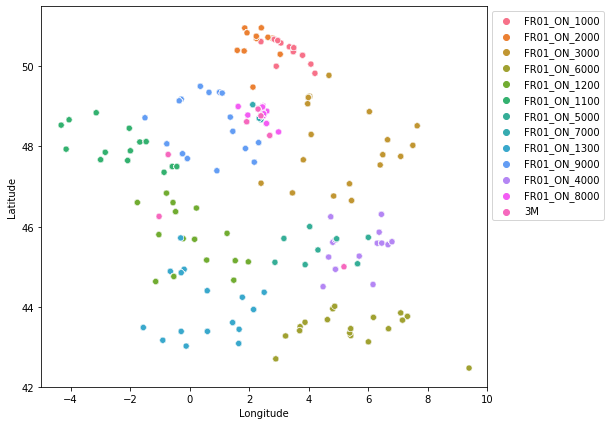

In [ ]:
plt.figure(figsize=(8, 7))

sns.scatterplot(data=vendas, y='Latitude', x='Longitude', hue="M2_Territory_ID")

plt.ylim(42, 51.5)
plt.xlim(-5, 10)
plt.legend(bbox_to_anchor=(1, 1))

# plt.savefig('C:/Users/breno/Desktop/Minhas coisas/PUCC/Segundo Semestre/ABI Academy Hack/Projetos/Ideação/ABIAcademyHack/Imagens documentação/França', facecolor='w', bbox_inches='tight')

plt.show()

# Prototipação

## Série-temporal

In [ ]:
vendas['Doc. Date'].max() - vendas['Doc. Date'].min()

# 1 ano, 6 meses, 3 semanas e 5 dias.

Timedelta('571 days 00:00:00')

## Clientes

In [ ]:
vendas['Ship-to nu'].value_counts()  # Dez clientes correspondem a 13,89% dos pedidos.

29379855    1448
29379651    1253
29595514    1198
29379625    1196
29563495    1181
            ... 
29801344      12
29724733       8
29996996       7
29801553       4
29833190       3
Name: Ship-to nu, Length: 179, dtype: int64

### 1º cliente: 29379855
**1448 pedidos, ou 1,97% do total.**

In [ ]:
vendas.loc[vendas['Ship-to nu'] == 29379855]

,Unnamed: 0,Doc. Date,Material,Order qty,Ship-to nu,PCS delivered,HL delivered,delivery_days,delivery_flag,lead_time_creation_vs_rdd_flag,MACO/HL,Groupement,Postal Code,Street,Sous groupement,M2_Territory_ID,M1_Territory_ID,Dépt,Brand,Subrand,SEGMENTS : Pils / Spécialités / Superspécialités/Bouteille Young adult,Container Type,Container Size,Variétés,Segment LE,Latitude,Longitude,Degre Alc,TTC,Brut + TE,Net + TE - Hors majoration de rompu de palette,DA
23,23,2021-01-11,71316,70.0,29379855,70.0,4.20,8,1,1,127.984305,C10,83630,ZA LES UCHANES,OLIVIER FRERES,FR01_ON_6000,FR01_ON_6007,83.0,BUD,BUD,Pils,PERFECT DRAFT,"6,000 L",Bud,PREMIUM LAGER,43.733,6.1765,5.0,15.774775,14.052,13.145646,0.0
24,24,2021-01-11,3530,70.0,29379855,70.0,4.20,8,1,1,200.202786,C10,83630,ZA LES UCHANES,OLIVIER FRERES,FR01_ON_6000,FR01_ON_6007,83.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,43.733,6.1765,5.1,21.257554,18.936,17.714628,0.0
25,25,2021-01-11,70601,140.0,29379855,140.0,8.40,8,1,1,186.707898,C10,83630,ZA LES UCHANES,OLIVIER FRERES,FR01_ON_6000,FR01_ON_6007,83.0,GOOSE,GOOSE,Craft,PERFECT DRAFT,"6,000 L",-,SUPER PREMIUM,43.733,6.1765,5.9,22.651200,18.876,18.876000,0.0
26,26,2021-01-11,18690,56.0,29379855,56.0,3.36,8,1,1,136.380864,C10,83630,ZA LES UCHANES,OLIVIER FRERES,FR01_ON_6000,FR01_ON_6007,83.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,43.733,6.1765,4.9,15.774775,14.052,13.145646,0.0
27,27,2021-01-11,11766,140.0,29379855,140.0,8.40,8,1,1,142.902378,C10,83630,ZA LES UCHANES,OLIVIER FRERES,FR01_ON_6000,FR01_ON_6007,83.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,43.733,6.1765,5.2,16.239532,14.466,13.532943,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66803,66803,2019-12-11,66989,140.0,29379855,140.0,8.40,5,1,0,195.334035,C10,83630,ZA LES UCHANES,OLIVIER FRERES,FR01_ON_6000,FR01_ON_6007,83.0,TRIPLE KARMELIET,TRIPLE KARMELIET,Craft,PERFECT DRAFT,"6,000 L",-,SUPER PREMIUM,43.733,6.1765,8.0,21.996000,18.330,18.330000,0.0
66804,66804,2019-12-11,61629,70.0,29379855,70.0,4.20,5,1,0,128.264406,C10,83630,ZA LES UCHANES,OLIVIER FRERES,FR01_ON_6000,FR01_ON_6007,83.0,KWAK,KWAK,Craft,PERFECT DRAFT,"6,000 L",-,SUPER PREMIUM,43.733,6.1765,8.4,18.093600,15.078,15.078000,0.0
66805,66805,2019-12-11,11766,210.0,29379855,210.0,12.60,5,1,0,142.902378,C10,83630,ZA LES UCHANES,OLIVIER FRERES,FR01_ON_6000,FR01_ON_6007,83.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,43.733,6.1765,5.2,16.239532,14.466,13.532943,0.0
66806,66806,2019-12-11,11574,240.0,29379855,240.0,72.00,5,1,0,85.212929,C10,83630,ZA LES UCHANES,OLIVIER FRERES,FR01_ON_6000,FR01_ON_6007,83.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,43.733,6.1765,4.8,56.818530,49.710,47.348775,0.0


In [ ]:
vendas['Brand'].loc[vendas['Ship-to nu'] == 29379855].value_counts()

LEFFE               241
HOEGAARDEN           86
TRIPLE KARMELIET     65
BUD                  59
KWAK                 48
GOOSE                46
CORONA               27
GINETTE               8
Name: Brand, dtype: int64

In [ ]:
vendas['Container Size'].loc[vendas['Ship-to nu'] == 29379855].value_counts()

6,000 L    421
0,330 L    121
0,355 L     35
6,000L       3
Name: Container Size, dtype: int64

In [ ]:
vendas['Order qty'].loc[vendas['Ship-to nu'] == 29379855].value_counts().head()
vendas['Order qty'].loc[vendas['Ship-to nu'] == 29379855].sum()

101498.0

In [ ]:
vendas['PCS delivered'].loc[vendas['Ship-to nu'] == 29379855].value_counts().head()
vendas['PCS delivered'].loc[vendas['Ship-to nu'] == 29379855].sum()

101044.0

In [ ]:
vendas['Doc. Date'].loc[vendas['Ship-to nu'] == 29379855].value_counts()

'''O cliente 29379855 fez seus 1448 pedidos em 82 ocasiões, uma média de um pedido a cada semana (571 / 82 = 6,93) e de 17,66 pedidos por ocasião.'''

'O cliente 29379855 fez seus 1448 pedidos em 82 ocasiões, uma média de um pedido a cada semana (571 / 82 = 6,93) e de 17,66 pedidos por ocasião.'

### 2º cliente: 29379651
**1253 pedidos, ou 1,70% do total.**

In [ ]:
vendas.loc[vendas['Ship-to nu'] == 29379651]

,Unnamed: 0,Doc. Date,Material,Order qty,Ship-to nu,PCS delivered,HL delivered,delivery_days,delivery_flag,lead_time_creation_vs_rdd_flag,MACO/HL,Groupement,Postal Code,Street,Sous groupement,M2_Territory_ID,M1_Territory_ID,Dépt,Brand,Subrand,SEGMENTS : Pils / Spécialités / Superspécialités/Bouteille Young adult,Container Type,Container Size,Variétés,Segment LE,Latitude,Longitude,Degre Alc,TTC,Brut + TE,Net + TE - Hors majoration de rompu de palette,DA
415,415,2021-01-27,71316,70.0,29379651,70.0,4.200,6,1,1,127.984305,C10,59132,18 RUE DU FOURNEAU,VIEVILLE SOGEDIB ETS VIEVILLE SARL,FR01_ON_1000,FR01_ON_1001,59.0,BUD,BUD,Pils,PERFECT DRAFT,"6,000 L",Bud,PREMIUM LAGER,50.0566,4.0745,5.0,15.774775,14.052,13.145646,0.0
416,416,2021-01-27,16550,150.0,29379651,150.0,13.500,6,1,1,25.345586,C10,59132,18 RUE DU FOURNEAU,VIEVILLE SOGEDIB ETS VIEVILLE SARL,FR01_ON_1000,FR01_ON_1001,59.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,50.0566,4.0745,3.8,6.408000,5.340,5.340000,0.0
417,417,2021-01-27,16519,150.0,29379651,150.0,13.500,6,1,1,38.306468,C10,59132,18 RUE DU FOURNEAU,VIEVILLE SOGEDIB ETS VIEVILLE SARL,FR01_ON_1000,FR01_ON_1001,59.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,50.0566,4.0745,4.6,7.747200,6.456,6.456000,0.0
418,418,2021-01-27,59874,60.0,29379651,60.0,4.752,6,1,1,186.904201,C10,59132,18 RUE DU FOURNEAU,VIEVILLE SOGEDIB ETS VIEVILLE SARL,FR01_ON_1000,FR01_ON_1001,59.0,TRIPLE KARMELIET,TRIPLE KARMELIET,Craft,BOTTLE VC,"0,330 L",-,SUPER PREMIUM,50.0566,4.0745,8.4,28.454400,23.712,23.712000,0.0
419,419,2021-01-27,66989,280.0,29379651,280.0,16.800,6,1,1,195.334035,C10,59132,18 RUE DU FOURNEAU,VIEVILLE SOGEDIB ETS VIEVILLE SARL,FR01_ON_1000,FR01_ON_1001,59.0,TRIPLE KARMELIET,TRIPLE KARMELIET,Craft,PERFECT DRAFT,"6,000 L",-,SUPER PREMIUM,50.0566,4.0745,8.0,21.996000,18.330,18.330000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69206,69206,2019-12-31,71317,32.0,29379651,32.0,9.600,7,1,1,133.230834,C10,59132,18 RUE DU FOURNEAU,VIEVILLE SOGEDIB ETS VIEVILLE SARL,FR01_ON_1000,FR01_ON_1001,59.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,50.0566,4.0745,5.0,66.694050,58.350,55.578375,0.0
69207,69207,2019-12-31,16550,150.0,29379651,150.0,13.500,7,1,1,25.345586,C10,59132,18 RUE DU FOURNEAU,VIEVILLE SOGEDIB ETS VIEVILLE SARL,FR01_ON_1000,FR01_ON_1001,59.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,50.0566,4.0745,3.8,6.408000,5.340,5.340000,0.0
69208,69208,2019-12-31,59848,18.0,29379651,18.0,5.400,7,1,1,180.045916,C10,59132,18 RUE DU FOURNEAU,VIEVILLE SOGEDIB ETS VIEVILLE SARL,FR01_ON_1000,FR01_ON_1001,59.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,50.0566,4.0745,8.0,97.704000,81.420,81.420000,0.0
69209,69209,2019-12-31,65660,90.0,29379651,90.0,18.000,7,1,1,172.071396,C10,59132,18 RUE DU FOURNEAU,VIEVILLE SOGEDIB ETS VIEVILLE SARL,FR01_ON_1000,FR01_ON_1001,59.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,50.0566,4.0745,8.0,66.336000,55.280,55.280000,0.0


In [ ]:
vendas['Brand'].loc[vendas['Ship-to nu'] == 29379651].value_counts()

LEFFE               301
HOEGAARDEN           88
TRIPLE KARMELIET     88
KWAK                 47
BUD                  24
GOOSE                12
GINETTE               9
CORONA                7
BIRRA DEL BORGO       5
Name: Brand, dtype: int64

In [ ]:
vendas['Container Size'].loc[vendas['Ship-to nu'] == 29379651].value_counts()

6,000 L    450
0,330 L    114
0,355 L      7
6,000L       5
0,750 L      4
1,5 L        1
Name: Container Size, dtype: int64

In [ ]:
vendas['Order qty'].loc[vendas['Ship-to nu'] == 29379651].value_counts().head()
vendas['Order qty'].loc[vendas['Ship-to nu'] == 29379651].sum()

183715.12

In [ ]:
vendas['PCS delivered'].loc[vendas['Ship-to nu'] == 29379651].value_counts().head()
vendas['PCS delivered'].loc[vendas['Ship-to nu'] == 29379651].sum()

202275.12

In [ ]:
vendas['Doc. Date'].loc[vendas['Ship-to nu'] == 29379651].value_counts()

''' O cliente 29379651 fez seus 1253 pedidos em 92 ocasiões, uma média de ????? e de 13,62 pedidos por ocasião.'''

' O cliente 29379651 fez seus 1253 pedidos em 92 ocasiões, uma média de ????? e de 13,62 pedidos por ocasião.'

### 3º cliente: 29595514
**1198 pedidos, ou 1,63% do total.**

In [ ]:
vendas.loc[vendas['Ship-to nu'] == 29595514]

,Unnamed: 0,Doc. Date,Material,Order qty,Ship-to nu,PCS delivered,HL delivered,delivery_days,delivery_flag,lead_time_creation_vs_rdd_flag,MACO/HL,Groupement,Postal Code,Street,Sous groupement,M2_Territory_ID,M1_Territory_ID,Dépt,Brand,Subrand,SEGMENTS : Pils / Spécialités / Superspécialités/Bouteille Young adult,Container Type,Container Size,Variétés,Segment LE,Latitude,Longitude,Degre Alc,TTC,Brut + TE,Net + TE - Hors majoration de rompu de palette,DA
113,113,2021-01-12,10946,770.0,29595514,770.0,46.20,7,1,1,150.689825,C10,62500,RUE EDOUARD POTTIER,SODIBOISSONS,FR01_ON_2000,FR01_ON_2003,62.0,LEFFE,LEFFE BLONDE,Spécialités,PERFECT DRAFT,"6,000 L",Blonde,PREMIUM,50.7518,2.2405,6.6,17.539099,15.582,14.615916,0.0
114,114,2021-01-12,10947,70.0,29595514,70.0,4.20,7,1,1,140.097307,C10,62500,RUE EDOUARD POTTIER,SODIBOISSONS,FR01_ON_2000,FR01_ON_2003,62.0,HOEGAARDEN,HOEGAARDEN WHITE,Spécialités,PERFECT DRAFT,"6,000 L",Blanche,PREMIUM,50.7518,2.2405,4.8,16.289683,14.472,13.574736,0.0
115,115,2021-01-12,19898,420.0,29595514,420.0,25.20,7,1,1,141.207904,C10,62500,RUE EDOUARD POTTIER,SODIBOISSONS,FR01_ON_2000,FR01_ON_2003,62.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,50.7518,2.2405,5.0,16.488749,14.688,13.740624,0.0
116,116,2021-01-12,11766,420.0,29595514,420.0,25.20,7,1,1,142.902378,C10,62500,RUE EDOUARD POTTIER,SODIBOISSONS,FR01_ON_2000,FR01_ON_2003,62.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,50.7518,2.2405,5.2,16.239532,14.466,13.532943,0.0
117,117,2021-01-12,53566,70.0,29595514,70.0,4.20,7,1,1,211.631664,C10,62500,RUE EDOUARD POTTIER,SODIBOISSONS,FR01_ON_2000,FR01_ON_2003,62.0,LEFFE,LEFFE ROYALE,Super Spécialités,PERFECT DRAFT,"6,000 L",IPA,PREMIUM,50.7518,2.2405,7.5,22.774752,20.856,18.978960,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68734,68734,2019-12-26,48537,70.0,29595514,70.0,4.20,8,1,1,224.599757,C10,62500,RUE EDOUARD POTTIER,SODIBOISSONS,FR01_ON_2000,FR01_ON_2003,62.0,LEFFE,LEFFE ROYALE,Super Spécialités,PERFECT DRAFT,"6,000 L",Whitbread Golding,PREMIUM,50.7518,2.2405,7.5,22.774752,20.856,18.978960,0.0
68735,68735,2019-12-26,33335,70.0,29595514,70.0,4.20,8,1,1,167.128531,C10,62500,RUE EDOUARD POTTIER,SODIBOISSONS,FR01_ON_2000,FR01_ON_2003,62.0,HOEGAARDEN,HOEGAARDEN ROSEE,Super Spécialités,PERFECT DRAFT,"6,000 L",Rosée,PREMIUM,50.7518,2.2405,3.0,19.099080,17.490,15.915900,0.0
68736,68736,2019-12-26,66839,40.0,29595514,40.0,8.00,8,1,1,231.861733,C10,62500,RUE EDOUARD POTTIER,SODIBOISSONS,FR01_ON_2000,FR01_ON_2003,62.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,50.7518,2.2405,7.5,80.388156,71.380,66.990130,0.0
68737,68737,2019-12-26,74583,20.0,29595514,20.0,4.00,8,1,1,NaN,C10,62500,RUE EDOUARD POTTIER,SODIBOISSONS,FR01_ON_2000,FR01_ON_2003,62.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,50.7518,2.2405,4.0,76.752000,63.960,63.960000,0.0


In [ ]:
vendas['Brand'].loc[vendas['Ship-to nu'] == 29595514].value_counts()

LEFFE               346
HOEGAARDEN          108
TRIPLE KARMELIET     58
BUD                  28
KWAK                 26
GOOSE                10
CORONA                7
GINETTE               3
CAMDEN                2
Name: Brand, dtype: int64

In [ ]:
vendas['Container Size'].loc[vendas['Ship-to nu'] == 29595514].value_counts()

6,000 L    513
0,330 L     66
0,355 L      7
6,000L       1
0,750 L      1
Name: Container Size, dtype: int64

In [ ]:
vendas['Order qty'].loc[vendas['Ship-to nu'] == 29595514].value_counts().head()
vendas['Order qty'].loc[vendas['Ship-to nu'] == 29595514].sum()

235350.32

In [ ]:
vendas['PCS delivered'].loc[vendas['Ship-to nu'] == 29595514].value_counts().head()
vendas['PCS delivered'].loc[vendas['Ship-to nu'] == 29595514].sum()

260157.5

In [ ]:
vendas['Doc. Date'].loc[vendas['Ship-to nu'] == 29595514].value_counts()

''' O cliente 29379651 fez seus 1198 pedidos em 123 ocasiões, uma média de ????? e de 9,74 pedidos por ocasião.'''

' O cliente 29379651 fez seus 1198 pedidos em 123 ocasiões, uma média de ????? e de 9,74 pedidos por ocasião.'

### 14º cliente: 29379283
**916 pedidos, ou 1,24% do total.**

In [ ]:
vendas['Ship-to nu'].value_counts()[13:15]


29379283    916
29379829    885
Name: Ship-to nu, dtype: int64

In [ ]:
vendas.loc[vendas['Ship-to nu'] == 29379283]

,Unnamed: 0,Doc. Date,Material,Order qty,Ship-to nu,PCS delivered,HL delivered,delivery_days,delivery_flag,lead_time_creation_vs_rdd_flag,MACO/HL,Groupement,Postal Code,Street,Sous groupement,M2_Territory_ID,M1_Territory_ID,Dépt,Brand,Subrand,SEGMENTS : Pils / Spécialités / Superspécialités/Bouteille Young adult,Container Type,Container Size,Variétés,Segment LE,Latitude,Longitude,Degre Alc,TTC,Brut + TE,Net + TE - Hors majoration de rompu de palette,DA
364,364,2021-01-26,19898,210.0,29379283,210.0,12.6,6,1,1,141.207904,C10,38760,4 Rue de l'Industrie,RAD,FR01_ON_5000,FR01_ON_5003,38.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,45.0717,5.6425,5.0,16.488749,14.688,13.740624,0.0
365,365,2021-01-26,11766,210.0,29379283,210.0,12.6,6,1,1,142.902378,C10,38760,4 Rue de l'Industrie,RAD,FR01_ON_5000,FR01_ON_5003,38.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,45.0717,5.6425,5.2,16.239532,14.466,13.532943,0.0
366,366,2021-01-26,10947,140.0,29379283,140.0,8.4,6,1,1,140.097307,C10,38760,4 Rue de l'Industrie,RAD,FR01_ON_5000,FR01_ON_5003,38.0,HOEGAARDEN,HOEGAARDEN WHITE,Spécialités,PERFECT DRAFT,"6,000 L",Blanche,PREMIUM,45.0717,5.6425,4.8,16.289683,14.472,13.574736,0.0
367,367,2021-01-26,10946,350.0,29379283,350.0,21.0,6,1,1,150.689825,C10,38760,4 Rue de l'Industrie,RAD,FR01_ON_5000,FR01_ON_5003,38.0,LEFFE,LEFFE BLONDE,Spécialités,PERFECT DRAFT,"6,000 L",Blonde,PREMIUM,45.0717,5.6425,6.6,17.539099,15.582,14.615916,0.0
368,368,2021-01-26,17028,70.0,29379283,70.0,4.2,6,1,1,217.449263,C10,38760,4 Rue de l'Industrie,RAD,FR01_ON_5000,FR01_ON_5003,38.0,LEFFE,LEFFE RITUEL 9°,Super Spécialités,PERFECT DRAFT,"6,000 L",Rituel,PREMIUM,45.0717,5.6425,9.0,22.774752,20.856,18.978960,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65456,65456,2019-12-03,61629,10.0,29379283,0.0,0.0,17,1,1,128.264406,C10,38760,4 Rue de l'Industrie,RAD,FR01_ON_5000,FR01_ON_5003,38.0,KWAK,KWAK,Craft,PERFECT DRAFT,"6,000 L",-,SUPER PREMIUM,45.0717,5.6425,8.4,18.093600,15.078,15.078000,0.0
65457,65457,2019-12-03,61629,10.0,29379283,10.0,0.6,20,1,1,128.264406,C10,38760,4 Rue de l'Industrie,RAD,FR01_ON_5000,FR01_ON_5003,38.0,KWAK,KWAK,Craft,PERFECT DRAFT,"6,000 L",-,SUPER PREMIUM,45.0717,5.6425,8.4,18.093600,15.078,15.078000,0.0
65547,65547,2019-12-03,11574,45.0,29379283,360.0,108.0,16,1,1,85.212929,C10,38760,4 Rue de l'Industrie,RAD,FR01_ON_5000,FR01_ON_5003,38.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,45.0717,5.6425,4.8,56.818530,49.710,47.348775,0.0
65548,65548,2019-12-03,3372,21.0,29379283,168.0,50.4,16,1,1,87.899004,C10,38760,4 Rue de l'Industrie,RAD,FR01_ON_5000,FR01_ON_5003,38.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,45.0717,5.6425,5.2,54.932580,48.060,45.777150,0.0


In [ ]:
vendas['Brand'].loc[vendas['Ship-to nu'] == 29379283].value_counts()

LEFFE               150
BUD                  41
GOOSE                39
HOEGAARDEN           34
KWAK                 31
TRIPLE KARMELIET     31
CAMDEN               22
GINETTE              15
BIRRA DEL BORGO       7
CORONA                7
Name: Brand, dtype: int64

In [ ]:
vendas['Container Size'].loc[vendas['Ship-to nu'] == 29379283].value_counts()

6,000 L    250
0,330 L     88
0,355 L     23
6,000L       8
0,473 L      5
0,750 L      3
Name: Container Size, dtype: int64

In [ ]:
vendas['Order qty'].loc[vendas['Ship-to nu'] == 29379283].value_counts().head()
vendas['Order qty'].loc[vendas['Ship-to nu'] == 29379283].sum()

59182.0

In [ ]:
vendas['PCS delivered'].loc[vendas['Ship-to nu'] == 29379283].value_counts().head()
vendas['PCS delivered'].loc[vendas['Ship-to nu'] == 29379283].sum()

73473.0

In [ ]:
vendas['Doc. Date'].loc[vendas['Ship-to nu'] == 29379283].value_counts()
''' O cliente 29379651 fez seus 916 pedidos em 51 ocasiões, uma média de ????? e de 17.96 pedidos por ocasião.'''

' O cliente 29379651 fez seus 916 pedidos em 51 ocasiões, uma média de ????? e de 17.96 pedidos por ocasião.'

### 15º cliente: 29379829
**885 pedidos, ou 1,20% do total.**

In [ ]:
vendas.loc[vendas['Ship-to nu'] == 29379829]

,Unnamed: 0,Doc. Date,Material,Order qty,Ship-to nu,PCS delivered,HL delivered,delivery_days,delivery_flag,lead_time_creation_vs_rdd_flag,MACO/HL,Groupement,Postal Code,Street,Sous groupement,M2_Territory_ID,M1_Territory_ID,Dépt,Brand,Subrand,SEGMENTS : Pils / Spécialités / Superspécialités/Bouteille Young adult,Container Type,Container Size,Variétés,Segment LE,Latitude,Longitude,Degre Alc,TTC,Brut + TE,Net + TE - Hors majoration de rompu de palette,DA
51,51,2021-01-11,60036,20.0,29379829,20.0,4.0000,3,1,0,113.447130,C10,70300,"ZAC du Bouquet, Rue du Bouquet",BURGEY ROBERT ET FILS,FR01_ON_3000,FR01_ON_3006,70.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,47.7954,6.4907,5.2,38.427660,33.620,32.023050,0.000
52,52,2021-01-11,10947,70.0,29379829,70.0,4.2000,3,1,0,140.097307,C10,70300,"ZAC du Bouquet, Rue du Bouquet",BURGEY ROBERT ET FILS,FR01_ON_3000,FR01_ON_3006,70.0,HOEGAARDEN,HOEGAARDEN WHITE,Spécialités,PERFECT DRAFT,"6,000 L",Blanche,PREMIUM,47.7954,6.4907,4.8,16.289683,14.472,13.574736,0.000
53,53,2021-01-11,10946,210.0,29379829,210.0,12.6000,3,1,0,150.689825,C10,70300,"ZAC du Bouquet, Rue du Bouquet",BURGEY ROBERT ET FILS,FR01_ON_3000,FR01_ON_3006,70.0,LEFFE,LEFFE BLONDE,Spécialités,PERFECT DRAFT,"6,000 L",Blonde,PREMIUM,47.7954,6.4907,6.6,17.539099,15.582,14.615916,0.000
54,54,2021-01-11,11766,140.0,29379829,140.0,8.4000,3,1,0,142.902378,C10,70300,"ZAC du Bouquet, Rue du Bouquet",BURGEY ROBERT ET FILS,FR01_ON_3000,FR01_ON_3006,70.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,47.7954,6.4907,5.2,16.239532,14.466,13.532943,0.000
55,55,2021-01-11,66989,70.0,29379829,70.0,4.2000,3,1,0,195.334035,C10,70300,"ZAC du Bouquet, Rue du Bouquet",BURGEY ROBERT ET FILS,FR01_ON_3000,FR01_ON_3006,70.0,TRIPLE KARMELIET,TRIPLE KARMELIET,Craft,PERFECT DRAFT,"6,000 L",-,SUPER PREMIUM,47.7954,6.4907,8.0,21.996000,18.330,18.330000,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68071,68071,2019-12-19,19898,2.0,29379829,140.0,8.4000,8,1,1,141.207904,C10,70300,"ZAC du Bouquet, Rue du Bouquet",BURGEY ROBERT ET FILS,FR01_ON_3000,FR01_ON_3006,70.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,47.7954,6.4907,5.0,16.488749,14.688,13.740624,0.000
68072,68072,2019-12-19,66989,2.0,29379829,140.0,8.4000,8,1,1,195.334035,C10,70300,"ZAC du Bouquet, Rue du Bouquet",BURGEY ROBERT ET FILS,FR01_ON_3000,FR01_ON_3006,70.0,TRIPLE KARMELIET,TRIPLE KARMELIET,Craft,PERFECT DRAFT,"6,000 L",-,SUPER PREMIUM,47.7954,6.4907,8.0,21.996000,18.330,18.330000,0.000
68073,68073,2019-12-19,61629,1.0,29379829,70.0,4.2000,8,1,1,128.264406,C10,70300,"ZAC du Bouquet, Rue du Bouquet",BURGEY ROBERT ET FILS,FR01_ON_3000,FR01_ON_3006,70.0,KWAK,KWAK,Craft,PERFECT DRAFT,"6,000 L",-,SUPER PREMIUM,47.7954,6.4907,8.4,18.093600,15.078,15.078000,0.000
68821,68821,2019-12-27,76623,1.0,29379829,0.0,0.0000,0,1,0,131.616055,C10,70300,"ZAC du Bouquet, Rue du Bouquet",BURGEY ROBERT ET FILS,FR01_ON_3000,FR01_ON_3006,70.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,47.7954,6.4907,5.8,25.453440,25.440,21.115200,0.096


In [ ]:
vendas['Brand'].loc[vendas['Ship-to nu'] == 29379829].value_counts()

LEFFE               181
HOEGAARDEN           64
BUD                  29
KWAK                 29
TRIPLE KARMELIET     26
GOOSE                24
CORONA                9
GINETTE               8
BIRRA DEL BORGO       5
Name: Brand, dtype: int64

In [ ]:
vendas['Container Size'].loc[vendas['Ship-to nu'] == 29379829].value_counts()

6,000 L    334
0,330 L     24
0,355 L     11
6,000L       5
0,33 L       1
Name: Container Size, dtype: int64

In [ ]:
vendas['Order qty'].loc[vendas['Ship-to nu'] == 29379829].value_counts().head()
vendas['Order qty'].loc[vendas['Ship-to nu'] == 29379829].sum()

19733.0

In [ ]:
vendas['PCS delivered'].loc[vendas['Ship-to nu'] == 29379829].value_counts().head()
vendas['PCS delivered'].loc[vendas['Ship-to nu'] == 29379829].sum()

75427.0

In [ ]:
vendas['Doc. Date'].loc[vendas['Ship-to nu'] == 29379829].value_counts()
''' O cliente 29379651 fez seus 916 pedidos em 51 ocasiões, uma média de ????? e de 17.96 pedidos por ocasião.'''

' O cliente 29379651 fez seus 916 pedidos em 51 ocasiões, uma média de ????? e de 17.96 pedidos por ocasião.'

### 30º cliente: 29379677
**697 pedidos, ou 0,95% do total.**

In [ ]:
vendas['Ship-to nu'].value_counts()[29:30]


29379677    697
Name: Ship-to nu, dtype: int64

In [ ]:
vendas.loc[vendas['Ship-to nu'] == 29379677]

,Unnamed: 0,Doc. Date,Material,Order qty,Ship-to nu,PCS delivered,HL delivered,delivery_days,delivery_flag,lead_time_creation_vs_rdd_flag,MACO/HL,Groupement,Postal Code,Street,Sous groupement,M2_Territory_ID,M1_Territory_ID,Dépt,Brand,Subrand,SEGMENTS : Pils / Spécialités / Superspécialités/Bouteille Young adult,Container Type,Container Size,Variétés,Segment LE,Latitude,Longitude,Degre Alc,TTC,Brut + TE,Net + TE - Hors majoration de rompu de palette,DA
2197,2197,2020-07-03,65660,45.0,29379677,45.0,9.0000,6,1,1,172.071396,C10,13200,VILLEVIEILLE,BRASSERIE DU DELTA,FR01_ON_6000,FR01_ON_6006,13.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,43.6768,4.6303,8.0,66.336000,55.280,55.28000,0.000
2198,2198,2020-07-03,66738,60.0,29379677,60.0,12.0000,6,1,1,110.884560,C10,13200,VILLEVIEILLE,BRASSERIE DU DELTA,FR01_ON_6000,FR01_ON_6006,13.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,43.6768,4.6303,4.8,39.753540,34.780,33.12795,0.000
2199,2199,2020-07-03,10965,32.0,29379677,32.0,6.4000,6,1,1,185.679127,C10,13200,VILLEVIEILLE,BRASSERIE DU DELTA,FR01_ON_6000,FR01_ON_6006,13.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,43.6768,4.6303,5.0,70.500120,62.600,58.75010,0.000
2200,2200,2020-07-03,59874,10.0,29379677,10.0,0.7920,6,1,1,186.904201,C10,13200,VILLEVIEILLE,BRASSERIE DU DELTA,FR01_ON_6000,FR01_ON_6006,13.0,TRIPLE KARMELIET,TRIPLE KARMELIET,Craft,BOTTLE VC,"0,330 L",-,SUPER PREMIUM,43.6768,4.6303,8.4,28.454400,23.712,23.71200,0.000
2201,2201,2020-07-03,3372,168.0,29379677,168.0,50.4000,6,1,1,87.899004,C10,13200,VILLEVIEILLE,BRASSERIE DU DELTA,FR01_ON_6000,FR01_ON_6006,13.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,43.6768,4.6303,5.2,54.932580,48.060,45.77715,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68893,68893,2019-12-27,48859,10.0,29379677,10.0,0.6000,10,1,1,114.365343,C10,13200,VILLEVIEILLE,BRASSERIE DU DELTA,FR01_ON_6000,FR01_ON_6006,13.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,43.6768,4.6303,5.2,12.316968,10.776,10.26414,0.000
68894,68894,2019-12-27,54232,54.0,29379677,54.0,4.6008,10,1,1,143.844165,C10,13200,VILLEVIEILLE,BRASSERIE DU DELTA,FR01_ON_6000,FR01_ON_6006,13.0,CORONA,CORONA EXTRA,Bouteille Young Adult,BOTTLE VP - Tendances,"0,355 L",Corona,SUPER PREMIUM,43.6768,4.6303,4.5,24.955776,27.840,20.79648,0.000
68895,68895,2019-12-27,9974,40.0,29379677,40.0,8.0000,10,1,1,159.127751,C10,13200,VILLEVIEILLE,BRASSERIE DU DELTA,FR01_ON_6000,FR01_ON_6006,13.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,43.6768,4.6303,4.8,57.619800,51.000,48.01650,0.000
68896,68896,2019-12-27,77589,72.0,29379677,72.0,5.7024,10,1,1,102.054025,C10,13200,VILLEVIEILLE,BRASSERIE DU DELTA,FR01_ON_6000,FR01_ON_6006,13.0,BUD,BUD,Bouteille Young Adult,BOTTLE VP - Tendances,"0,330 L",Bud,PREMIUM LAGER,43.6768,4.6303,5.0,22.943808,22.296,19.02384,0.096


In [ ]:
vendas['Brand'].loc[vendas['Ship-to nu'] == 29379677].value_counts()

LEFFE               77
HOEGAARDEN          35
CORONA              24
TRIPLE KARMELIET    20
KWAK                16
BUD                  8
GINETTE              1
Name: Brand, dtype: int64

In [ ]:
vendas['Container Size'].loc[vendas['Ship-to nu'] == 29379677].value_counts()

6,000 L    119
0,330 L     38
0,355 L     19
0,21 L       5
Name: Container Size, dtype: int64

In [ ]:
vendas['Order qty'].loc[vendas['Ship-to nu'] == 29379677].value_counts().head()
vendas['Order qty'].loc[vendas['Ship-to nu'] == 29379677].sum()

45954.0

In [ ]:
vendas['PCS delivered'].loc[vendas['Ship-to nu'] == 29379677].value_counts().head()
vendas['PCS delivered'].loc[vendas['Ship-to nu'] == 29379677].sum()

45210.0

In [ ]:
vendas['Doc. Date'].loc[vendas['Ship-to nu'] == 29379677].value_counts()
''' O cliente 29379677 fez seus 697 pedidos em 51 ocasiões, uma média de ????? e de 15.15 pedidos por ocasião.'''

' O cliente 29379677 fez seus 697 pedidos em 51 ocasiões, uma média de ????? e de 15.15 pedidos por ocasião.'

### 31º cliente: 29563834
**693 pedidos, ou 0,94% do total.**

In [ ]:
vendas['Ship-to nu'].value_counts()[30:31]

29563834    693
Name: Ship-to nu, dtype: int64

In [ ]:
vendas.loc[vendas['Ship-to nu'] == 29563834]

,Unnamed: 0,Doc. Date,Material,Order qty,Ship-to nu,PCS delivered,HL delivered,delivery_days,delivery_flag,lead_time_creation_vs_rdd_flag,MACO/HL,Groupement,Postal Code,Street,Sous groupement,M2_Territory_ID,M1_Territory_ID,Dépt,Brand,Subrand,SEGMENTS : Pils / Spécialités / Superspécialités/Bouteille Young adult,Container Type,Container Size,Variétés,Segment LE,Latitude,Longitude,Degre Alc,TTC,Brut + TE,Net + TE - Hors majoration de rompu de palette,DA
979,979,2021-02-18,71316,30.0,29563834,30.0,1.80,6,1,1,127.984305,C10,56500,ZA DE KERANA,COZIGOU,FR01_ON_1100,FR01_ON_1103,56.0,BUD,BUD,Pils,PERFECT DRAFT,"6,000 L",Bud,PREMIUM LAGER,47.8546,-2.8348,5.0,15.774775,14.052,13.145646,0.0
980,980,2021-02-18,63480,56.0,29563834,56.0,3.36,6,1,1,132.779745,C10,56500,ZA DE KERANA,COZIGOU,FR01_ON_1100,FR01_ON_1103,56.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,47.8546,-2.8348,5.0,16.168118,14.364,13.473432,0.0
981,981,2021-02-18,19898,280.0,29563834,280.0,16.80,6,1,1,141.207904,C10,56500,ZA DE KERANA,COZIGOU,FR01_ON_1100,FR01_ON_1103,56.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,47.8546,-2.8348,5.0,16.488749,14.688,13.740624,0.0
982,982,2021-02-18,63481,56.0,29563834,56.0,3.36,6,1,1,133.459685,C10,56500,ZA DE KERANA,COZIGOU,FR01_ON_1100,FR01_ON_1103,56.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,47.8546,-2.8348,5.2,16.019539,14.232,13.349616,0.0
983,983,2021-02-18,11766,210.0,29563834,210.0,12.60,6,1,1,142.902378,C10,56500,ZA DE KERANA,COZIGOU,FR01_ON_1100,FR01_ON_1103,56.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,47.8546,-2.8348,5.2,16.239532,14.466,13.532943,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67985,67985,2019-12-18,18690,56.0,29563834,56.0,3.36,8,1,1,136.380864,C10,56500,ZA DE KERANA,COZIGOU,FR01_ON_1100,FR01_ON_1103,56.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,47.8546,-2.8348,4.9,15.774775,14.052,13.145646,0.0
67986,67986,2019-12-18,48537,70.0,29563834,70.0,4.20,8,1,1,224.599757,C10,56500,ZA DE KERANA,COZIGOU,FR01_ON_1100,FR01_ON_1103,56.0,LEFFE,LEFFE ROYALE,Super Spécialités,PERFECT DRAFT,"6,000 L",Whitbread Golding,PREMIUM,47.8546,-2.8348,7.5,22.774752,20.856,18.978960,0.0
67987,67987,2019-12-18,61629,70.0,29563834,70.0,4.20,8,1,1,128.264406,C10,56500,ZA DE KERANA,COZIGOU,FR01_ON_1100,FR01_ON_1103,56.0,KWAK,KWAK,Craft,PERFECT DRAFT,"6,000 L",-,SUPER PREMIUM,47.8546,-2.8348,8.4,18.093600,15.078,15.078000,0.0
67988,67988,2019-12-18,66989,70.0,29563834,70.0,4.20,8,1,1,195.334035,C10,56500,ZA DE KERANA,COZIGOU,FR01_ON_1100,FR01_ON_1103,56.0,TRIPLE KARMELIET,TRIPLE KARMELIET,Craft,PERFECT DRAFT,"6,000 L",-,SUPER PREMIUM,47.8546,-2.8348,8.0,21.996000,18.330,18.330000,0.0


In [ ]:
vendas['Brand'].loc[vendas['Ship-to nu'] == 29563834].value_counts()

LEFFE               90
HOEGAARDEN          32
BUD                 22
TRIPLE KARMELIET    21
KWAK                20
GOOSE               19
CORONA              14
CAMDEN               6
GINETTE              2
Name: Brand, dtype: int64

In [ ]:
vendas['Container Size'].loc[vendas['Ship-to nu'] == 29563834].value_counts()

6,000 L    179
0,330 L     32
0,355 L     15
Name: Container Size, dtype: int64

In [ ]:
vendas['Order qty'].loc[vendas['Ship-to nu'] == 29563834].value_counts().head()
vendas['Order qty'].loc[vendas['Ship-to nu'] == 29563834].sum()

31557.0

In [ ]:
vendas['PCS delivered'].loc[vendas['Ship-to nu'] == 29563834].value_counts().head()
vendas['PCS delivered'].loc[vendas['Ship-to nu'] == 29563834].sum()

82462.0

In [ ]:
vendas['Doc. Date'].loc[vendas['Ship-to nu'] == 29563834].value_counts()
''' O cliente 29563834 fez seus 693 pedidos em 81 ocasiões, uma média de ????? e de 8.55 pedidos por ocasião.'''

' O cliente 29563834 fez seus 693 pedidos em 81 ocasiões, uma média de ????? e de 8.55 pedidos por ocasião.'

### 45º cliente: 29563830
**597 pedidos, ou 0,81% do total.**

In [ ]:
vendas['Ship-to nu'].value_counts()[44:45]

29563830    597
Name: Ship-to nu, dtype: int64

In [ ]:
vendas.loc[vendas['Ship-to nu'] == 29563830]

,Unnamed: 0,Doc. Date,Material,Order qty,Ship-to nu,PCS delivered,HL delivered,delivery_days,delivery_flag,lead_time_creation_vs_rdd_flag,MACO/HL,Groupement,Postal Code,Street,Sous groupement,M2_Territory_ID,M1_Territory_ID,Dépt,Brand,Subrand,SEGMENTS : Pils / Spécialités / Superspécialités/Bouteille Young adult,Container Type,Container Size,Variétés,Segment LE,Latitude,Longitude,Degre Alc,TTC,Brut + TE,Net + TE - Hors majoration de rompu de palette,DA
1370,1370,2020-07-01,11574,480.0,29563830,0.0,0.000,0,1,0,85.212929,C10,12000,RUE DES CHARPENTIERS,MESPOULET,FR01_ON_1300,FR01_ON_1304,12.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,44.3601,2.5051,4.8,56.818530,49.710,47.348775,0.0
1371,1371,2020-07-01,11574,480.0,29563830,480.0,144.000,2,1,0,85.212929,C10,12000,RUE DES CHARPENTIERS,MESPOULET,FR01_ON_1300,FR01_ON_1304,12.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,44.3601,2.5051,4.8,56.818530,49.710,47.348775,0.0
2075,2075,2020-07-02,3372,480.0,29563830,480.0,144.000,7,0,1,87.899004,C10,12000,RUE DES CHARPENTIERS,MESPOULET,FR01_ON_1300,FR01_ON_1304,12.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,44.3601,2.5051,5.2,54.932580,48.060,45.777150,0.0
2076,2076,2020-07-02,5983,48.0,29563830,48.0,14.400,7,0,1,133.670982,C10,12000,RUE DES CHARPENTIERS,MESPOULET,FR01_ON_1300,FR01_ON_1304,12.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,44.3601,2.5051,5.7,78.284070,68.490,65.236725,0.0
2077,2077,2020-07-02,66738,80.0,29563830,80.0,16.000,7,0,1,110.884560,C10,12000,RUE DES CHARPENTIERS,MESPOULET,FR01_ON_1300,FR01_ON_1304,12.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,44.3601,2.5051,4.8,39.753540,34.780,33.127950,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65366,65366,2019-12-03,61629,20.0,29563830,20.0,1.200,7,1,1,128.264406,C10,12000,RUE DES CHARPENTIERS,MESPOULET,FR01_ON_1300,FR01_ON_1304,12.0,KWAK,KWAK,Craft,PERFECT DRAFT,"6,000 L",-,SUPER PREMIUM,44.3601,2.5051,8.4,18.093600,15.078,15.078000,0.0
65367,65367,2019-12-03,10611,20.0,29563830,20.0,1.200,7,1,1,147.379409,C10,12000,RUE DES CHARPENTIERS,MESPOULET,FR01_ON_1300,FR01_ON_1304,12.0,LEFFE,LEFFE BRUNE,Spécialités,PERFECT DRAFT,"6,000 L",Brune,PREMIUM,44.3601,2.5051,6.5,18.673704,16.590,15.561420,0.0
65570,65570,2019-12-04,77721,10.0,29563830,10.0,0.792,8,1,1,NaN,C10,12000,RUE DES CHARPENTIERS,MESPOULET,FR01_ON_1300,FR01_ON_1304,12.0,LEFFE,"LEFFE BLONDE 0,0",Spécialités,BOTTLE VC,"0,330 L",Blonde,PREMIUM,44.3601,2.5051,0.0,24.024067,21.264,20.020056,0.0
65571,65571,2019-12-04,15793,10.0,29563830,10.0,0.000,8,1,1,NaN,C10,12000,RUE DES CHARPENTIERS,MESPOULET,FR01_ON_1300,FR01_ON_1304,12.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,44.3601,2.5051,NaN,NaN,NaN,NaN,NaN


In [ ]:
vendas['Brand'].loc[vendas['Ship-to nu'] == 29563830].value_counts()

LEFFE               68
HOEGAARDEN          39
KWAK                20
TRIPLE KARMELIET     7
CORONA               7
BUD                  6
GOOSE                1
Name: Brand, dtype: int64

In [ ]:
vendas['Container Size'].loc[vendas['Ship-to nu'] == 29563830].value_counts()

6,000 L    110
0,330 L     30
0,355 L      8
Name: Container Size, dtype: int64

In [ ]:
vendas['Order qty'].loc[vendas['Ship-to nu'] == 29563830].value_counts().head()
vendas['Order qty'].loc[vendas['Ship-to nu'] == 29563830].sum()

31985.0

In [ ]:
vendas['PCS delivered'].loc[vendas['Ship-to nu'] == 29563830].value_counts().head()
vendas['PCS delivered'].loc[vendas['Ship-to nu'] == 29563830].sum()

48503.0

In [ ]:
vendas['Doc. Date'].loc[vendas['Ship-to nu'] == 29563830].value_counts() # 48
''' O cliente 29563830 fez seus 597 pedidos em 48 ocasiões, uma média de ????? e de 12.44 pedidos por ocasião.'''

' O cliente 29563830 fez seus 597 pedidos em 48 ocasiões, uma média de ????? e de 12.44 pedidos por ocasião.'

### 46º cliente: 29379684
**594 pedidos, ou 0,81% do total.**

In [ ]:
vendas['Ship-to nu'].value_counts()[45:46]

29379684    594
Name: Ship-to nu, dtype: int64

In [ ]:
vendas.loc[vendas['Ship-to nu'] == 29379684]

,Unnamed: 0,Doc. Date,Material,Order qty,Ship-to nu,PCS delivered,HL delivered,delivery_days,delivery_flag,lead_time_creation_vs_rdd_flag,MACO/HL,Groupement,Postal Code,Street,Sous groupement,M2_Territory_ID,M1_Territory_ID,Dépt,Brand,Subrand,SEGMENTS : Pils / Spécialités / Superspécialités/Bouteille Young adult,Container Type,Container Size,Variétés,Segment LE,Latitude,Longitude,Degre Alc,TTC,Brut + TE,Net + TE - Hors majoration de rompu de palette,DA
396,396,2021-01-26,66989,70.0,29379684,70.0,4.2000,6,1,1,195.334035,C10,31290,Z.I. DU SUD-BORDE BLANCHE,CROUZIL FRERES,FR01_ON_1300,FR01_ON_1302,31.0,TRIPLE KARMELIET,TRIPLE KARMELIET,Craft,PERFECT DRAFT,"6,000 L",-,SUPER PREMIUM,43.4358,1.6628,8.0,21.996000,18.330,18.330000,0.000
397,397,2021-01-26,11766,210.0,29379684,210.0,12.6000,6,1,1,142.902378,C10,31290,Z.I. DU SUD-BORDE BLANCHE,CROUZIL FRERES,FR01_ON_1300,FR01_ON_1302,31.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,43.4358,1.6628,5.2,16.239532,14.466,13.532943,0.000
398,398,2021-01-26,20614,10.0,29379684,10.0,0.6000,6,1,1,195.587448,C10,31290,Z.I. DU SUD-BORDE BLANCHE,CROUZIL FRERES,FR01_ON_1300,FR01_ON_1302,31.0,LEFFE,LEFFE RUBY,Super Spécialités,PERFECT DRAFT,"6,000 L",Ruby,PREMIUM,43.4358,1.6628,5.0,22.774752,20.856,18.978960,0.000
399,399,2021-01-26,63480,16.0,29379684,16.0,0.9600,6,1,1,132.779745,C10,31290,Z.I. DU SUD-BORDE BLANCHE,CROUZIL FRERES,FR01_ON_1300,FR01_ON_1302,31.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,43.4358,1.6628,5.0,16.168118,14.364,13.473432,0.000
400,400,2021-01-26,48537,20.0,29379684,20.0,1.2000,6,1,1,224.599757,C10,31290,Z.I. DU SUD-BORDE BLANCHE,CROUZIL FRERES,FR01_ON_1300,FR01_ON_1302,31.0,LEFFE,LEFFE ROYALE,Super Spécialités,PERFECT DRAFT,"6,000 L",Whitbread Golding,PREMIUM,43.4358,1.6628,7.5,22.774752,20.856,18.978960,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68298,68298,2019-12-23,54232,108.0,29379684,108.0,9.2016,7,1,1,143.844165,C10,31290,Z.I. DU SUD-BORDE BLANCHE,CROUZIL FRERES,FR01_ON_1300,FR01_ON_1302,31.0,CORONA,CORONA EXTRA,Bouteille Young Adult,BOTTLE VP - Tendances,"0,355 L",Corona,SUPER PREMIUM,43.4358,1.6628,4.5,24.955776,27.840,20.796480,0.000
68299,68299,2019-12-23,19898,140.0,29379684,140.0,8.4000,7,1,1,141.207904,C10,31290,Z.I. DU SUD-BORDE BLANCHE,CROUZIL FRERES,FR01_ON_1300,FR01_ON_1302,31.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,43.4358,1.6628,5.0,16.488749,14.688,13.740624,0.000
68300,68300,2019-12-23,59874,120.0,29379684,120.0,9.5040,7,1,1,186.904201,C10,31290,Z.I. DU SUD-BORDE BLANCHE,CROUZIL FRERES,FR01_ON_1300,FR01_ON_1302,31.0,TRIPLE KARMELIET,TRIPLE KARMELIET,Craft,BOTTLE VC,"0,330 L",-,SUPER PREMIUM,43.4358,1.6628,8.4,28.454400,23.712,23.712000,0.000
68301,68301,2019-12-23,76623,144.0,29379684,144.0,11.4048,7,1,1,131.616055,C10,31290,Z.I. DU SUD-BORDE BLANCHE,CROUZIL FRERES,FR01_ON_1300,FR01_ON_1302,31.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,43.4358,1.6628,5.8,25.453440,25.440,21.115200,0.096


In [ ]:
vendas['Brand'].loc[vendas['Ship-to nu'] == 29379684].value_counts()

LEFFE               103
HOEGAARDEN           34
BUD                  28
TRIPLE KARMELIET     28
KWAK                 23
GOOSE                19
GINETTE              19
CORONA               15
CAMDEN                2
BIRRA DEL BORGO       1
Name: Brand, dtype: int64

In [ ]:
vendas['Container Size'].loc[vendas['Ship-to nu'] == 29379684].value_counts()

6,000 L    204
0,330 L     30
0,355 L     19
6,000L      13
0,750 L      4
1,5 L        2
Name: Container Size, dtype: int64

In [ ]:
vendas['Order qty'].loc[vendas['Ship-to nu'] == 29379684].value_counts().head()
vendas['Order qty'].loc[vendas['Ship-to nu'] == 29379684].sum()

35872.0

In [ ]:
vendas['PCS delivered'].loc[vendas['Ship-to nu'] == 29379684].value_counts().head()
vendas['PCS delivered'].loc[vendas['Ship-to nu'] == 29379684].sum()

37342.0

In [ ]:
vendas['Doc. Date'].loc[vendas['Ship-to nu'] == 29379684].value_counts() #38
''' O cliente 29379684 fez seus 594 pedidos em 38 ocasiões, uma média de ????? e de 8.55 pedidos por ocasião.'''

' O cliente 29379684 fez seus 594 pedidos em 38 ocasiões, uma média de ????? e de 8.55 pedidos por ocasião.'

### 60º cliente: 29379611
**496 pedidos, ou 0,67% do total.**

In [ ]:
vendas['Ship-to nu'].value_counts()[59:60]

29379611    496
Name: Ship-to nu, dtype: int64

In [ ]:
vendas.loc[vendas['Ship-to nu'] == 29379611]

,Unnamed: 0,Doc. Date,Material,Order qty,Ship-to nu,PCS delivered,HL delivered,delivery_days,delivery_flag,lead_time_creation_vs_rdd_flag,MACO/HL,Groupement,Postal Code,Street,Sous groupement,M2_Territory_ID,M1_Territory_ID,Dépt,Brand,Subrand,SEGMENTS : Pils / Spécialités / Superspécialités/Bouteille Young adult,Container Type,Container Size,Variétés,Segment LE,Latitude,Longitude,Degre Alc,TTC,Brut + TE,Net + TE - Hors majoration de rompu de palette,DA
1764,1764,2020-07-02,3410,30.0,29379611,0.0,0.0,0,1,0,170.305026,C10,50530,ROUTE DE CAROLLES,MALPLANCHE,FR01_ON_9000,FR01_ON_9001,50.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,48.7167,-1.5,6.6,92.361150,81.75,76.967625,0.0
1765,1765,2020-07-02,3410,30.0,29379611,240.0,72.0,4,1,0,170.305026,C10,50530,ROUTE DE CAROLLES,MALPLANCHE,FR01_ON_9000,FR01_ON_9001,50.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,48.7167,-1.5,6.6,92.361150,81.75,76.967625,0.0
1766,1766,2020-07-02,65660,4.0,29379611,0.0,0.0,0,1,0,172.071396,C10,50530,ROUTE DE CAROLLES,MALPLANCHE,FR01_ON_9000,FR01_ON_9001,50.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,48.7167,-1.5,8.0,66.336000,55.28,55.280000,0.0
1767,1767,2020-07-02,65660,4.0,29379611,60.0,12.0,4,1,0,172.071396,C10,50530,ROUTE DE CAROLLES,MALPLANCHE,FR01_ON_9000,FR01_ON_9001,50.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,48.7167,-1.5,8.0,66.336000,55.28,55.280000,0.0
1768,1768,2020-07-02,11574,15.0,29379611,0.0,0.0,0,1,0,85.212929,C10,50530,ROUTE DE CAROLLES,MALPLANCHE,FR01_ON_9000,FR01_ON_9001,50.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,48.7167,-1.5,4.8,56.818530,49.71,47.348775,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66281,66281,2019-12-09,6013,32.0,29379611,256.0,51.2,3,1,0,159.181849,C10,50530,ROUTE DE CAROLLES,MALPLANCHE,FR01_ON_9000,FR01_ON_9001,50.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,48.7167,-1.5,6.6,62.726496,55.52,52.272080,0.0
66282,66282,2019-12-09,66738,1.0,29379611,20.0,4.0,3,1,0,110.884560,C10,50530,ROUTE DE CAROLLES,MALPLANCHE,FR01_ON_9000,FR01_ON_9001,50.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,48.7167,-1.5,4.8,39.753540,34.78,33.127950,0.0
66283,66283,2019-12-09,3410,30.0,29379611,240.0,72.0,3,1,0,170.305026,C10,50530,ROUTE DE CAROLLES,MALPLANCHE,FR01_ON_9000,FR01_ON_9001,50.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,48.7167,-1.5,6.6,92.361150,81.75,76.967625,0.0
68225,68225,2019-12-20,3410,48.0,29379611,384.0,115.2,6,1,1,170.305026,C10,50530,ROUTE DE CAROLLES,MALPLANCHE,FR01_ON_9000,FR01_ON_9001,50.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,48.7167,-1.5,6.6,92.361150,81.75,76.967625,0.0


In [ ]:
vendas['Brand'].loc[vendas['Ship-to nu'] == 29379611].value_counts()

LEFFE               81
HOEGAARDEN          35
TRIPLE KARMELIET    23
KWAK                14
CORONA               9
GINETTE              7
BUD                  1
GOOSE                1
BIRRA DEL BORGO      1
Name: Brand, dtype: int64

In [ ]:
vendas['Container Size'].loc[vendas['Ship-to nu'] == 29379611].value_counts()

6,000 L    131
0,330 L     28
0,355 L      9
6,000L       3
0,25 L       1
Name: Container Size, dtype: int64

In [ ]:
vendas['Order qty'].loc[vendas['Ship-to nu'] == 29379611].value_counts().head()
vendas['Order qty'].loc[vendas['Ship-to nu'] == 29379611].sum()

34487.0

In [ ]:
vendas['PCS delivered'].loc[vendas['Ship-to nu'] == 29379611].value_counts().head()
vendas['PCS delivered'].loc[vendas['Ship-to nu'] == 29379611].sum()

47480.0

In [ ]:
vendas['Doc. Date'].loc[vendas['Ship-to nu'] == 29379611].value_counts() #42
''' O cliente 29379611 fez seus 496 pedidos em 42 ocasiões, uma média de ????? e de 11.81 pedidos por ocasião.'''

' O cliente 29379611 fez seus 496 pedidos em 42 ocasiões, uma média de ????? e de 11.81 pedidos por ocasião.'

### 61° cliente: 29379826
**481 pedidos, ou 0.65% do total**

In [ ]:
vendas['Ship-to nu'].value_counts()[60:61]

29379826    481
Name: Ship-to nu, dtype: int64

In [ ]:
vendas.loc[vendas['Ship-to nu'] == 29379826]

,Unnamed: 0,Doc. Date,Material,Order qty,Ship-to nu,PCS delivered,HL delivered,delivery_days,delivery_flag,lead_time_creation_vs_rdd_flag,MACO/HL,Groupement,Postal Code,Street,Sous groupement,M2_Territory_ID,M1_Territory_ID,Dépt,Brand,Subrand,SEGMENTS : Pils / Spécialités / Superspécialités/Bouteille Young adult,Container Type,Container Size,Variétés,Segment LE,Latitude,Longitude,Degre Alc,TTC,Brut + TE,Net + TE - Hors majoration de rompu de palette,DA
1422,1422,2020-07-01,74582,20.0,29379826,20.0,4.0000,6,1,1,172.744946,DISTRIBOISSONS,94000,3 IMPASSE DES MARAIS ZI LES GRANDS MARAIS GAROSUD,J.MILLIET BERCY BISTROT CASH,FR01_ON_8000,FR01_ON_8006,75.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,48.7833,2.4667,5.0,65.029680,54.30,54.191400,0.0
1423,1423,2020-07-01,9974,120.0,29379826,120.0,24.0000,6,1,1,159.127751,DISTRIBOISSONS,94000,3 IMPASSE DES MARAIS ZI LES GRANDS MARAIS GAROSUD,J.MILLIET BERCY BISTROT CASH,FR01_ON_8000,FR01_ON_8006,75.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,48.7833,2.4667,4.8,58.384800,51.00,48.654000,0.0
1424,1424,2020-07-01,3372,96.0,29379826,96.0,28.8000,6,1,1,87.899004,DISTRIBOISSONS,94000,3 IMPASSE DES MARAIS ZI LES GRANDS MARAIS GAROSUD,J.MILLIET BERCY BISTROT CASH,FR01_ON_8000,FR01_ON_8006,75.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,48.7833,2.4667,5.2,55.711152,48.06,46.425960,0.0
1425,1425,2020-07-01,59848,90.0,29379826,90.0,27.0000,6,1,1,180.045916,DISTRIBOISSONS,94000,3 IMPASSE DES MARAIS ZI LES GRANDS MARAIS GAROSUD,J.MILLIET BERCY BISTROT CASH,FR01_ON_8000,FR01_ON_8006,75.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,48.7833,2.4667,8.0,97.508592,81.42,81.257160,0.0
1426,1426,2020-07-01,59847,18.0,29379826,18.0,5.4000,6,1,1,141.413166,DISTRIBOISSONS,94000,3 IMPASSE DES MARAIS ZI LES GRANDS MARAIS GAROSUD,J.MILLIET BERCY BISTROT CASH,FR01_ON_8000,FR01_ON_8006,75.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,48.7833,2.4667,8.4,88.454736,73.86,73.712280,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67029,67029,2019-12-12,54232,26.0,29379826,1404.0,119.6208,7,1,1,143.844165,DISTRIBOISSONS,94000,3 IMPASSE DES MARAIS ZI LES GRANDS MARAIS GAROSUD,J.MILLIET BERCY BISTROT CASH,FR01_ON_8000,FR01_ON_8006,75.0,CORONA,CORONA EXTRA,Bouteille Young Adult,BOTTLE VP - Tendances,"0,355 L",Corona,SUPER PREMIUM,48.7833,2.4667,4.5,26.278733,27.84,21.898944,0.0
67030,67030,2019-12-12,3410,15.0,29379826,120.0,36.0000,7,1,1,170.305026,DISTRIBOISSONS,94000,3 IMPASSE DES MARAIS ZI LES GRANDS MARAIS GAROSUD,J.MILLIET BERCY BISTROT CASH,FR01_ON_8000,FR01_ON_8006,75.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,48.7833,2.4667,6.6,93.116520,81.75,77.597100,0.0
67031,67031,2019-12-12,71317,48.0,29379826,384.0,115.2000,14,1,1,133.230834,DISTRIBOISSONS,94000,3 IMPASSE DES MARAIS ZI LES GRANDS MARAIS GAROSUD,J.MILLIET BERCY BISTROT CASH,FR01_ON_8000,FR01_ON_8006,75.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,48.7833,2.4667,5.0,67.639320,58.35,56.366100,0.0
67032,67032,2019-12-12,3410,30.0,29379826,240.0,72.0000,14,1,1,170.305026,DISTRIBOISSONS,94000,3 IMPASSE DES MARAIS ZI LES GRANDS MARAIS GAROSUD,J.MILLIET BERCY BISTROT CASH,FR01_ON_8000,FR01_ON_8006,75.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,48.7833,2.4667,6.6,93.116520,81.75,77.597100,0.0


In [ ]:
vendas['Brand'].loc[vendas['Ship-to nu'] == 29379826].value_counts()

LEFFE               52
HOEGAARDEN          20
TRIPLE KARMELIET    19
GINETTE             17
BUD                 16
GOOSE               16
KWAK                15
CAMDEN              14
CORONA              12
BIRRA DEL BORGO      1
Name: Brand, dtype: int64

In [ ]:
vendas['Container Size'].loc[vendas['Ship-to nu'] == 29379826].value_counts()

0,330 L    83
6,000 L    76
0,355 L    16
0,750 L     3
6,000L      3
1,5 L       1
Name: Container Size, dtype: int64

In [ ]:
vendas['Order qty'].loc[vendas['Ship-to nu'] == 29379826].value_counts().head()
vendas['Order qty'].loc[vendas['Ship-to nu'] == 29379826].sum()

13189.0

In [ ]:
vendas['PCS delivered'].loc[vendas['Ship-to nu'] == 29379826].value_counts().head()
vendas['PCS delivered'].loc[vendas['Ship-to nu'] == 29379826].sum()

26501.0

In [ ]:
vendas['Doc. Date'].loc[vendas['Ship-to nu'] == 29379826].value_counts() #39
''' O cliente 29379826 fez seus 481 pedidos em 39 ocasiões, uma média de ????? e de 12.33 pedidos por ocasião.'''

' O cliente 29379826 fez seus 481 pedidos em 39 ocasiões, uma média de ????? e de 12.33 pedidos por ocasião.'

### 75° cliente: 29379635
**399 pedidos, ou 0,54% do total**

In [ ]:
vendas['Ship-to nu'].value_counts()[74:75]

29379635    399
Name: Ship-to nu, dtype: int64

In [ ]:
vendas.loc[vendas['Ship-to nu'] == 29379635]

,Unnamed: 0,Doc. Date,Material,Order qty,Ship-to nu,PCS delivered,HL delivered,delivery_days,delivery_flag,lead_time_creation_vs_rdd_flag,MACO/HL,Groupement,Postal Code,Street,Sous groupement,M2_Territory_ID,M1_Territory_ID,Dépt,Brand,Subrand,SEGMENTS : Pils / Spécialités / Superspécialités/Bouteille Young adult,Container Type,Container Size,Variétés,Segment LE,Latitude,Longitude,Degre Alc,TTC,Brut + TE,Net + TE - Hors majoration de rompu de palette,DA
39,39,2021-01-11,53566,10.0,29379635,10.0,0.6,4,1,1,211.631664,C10,59270,VIEUX CHEMIN DES LOUPS,ENTREPOTS DES FLANDRES,FR01_ON_2000,FR01_ON_2006,59.0,LEFFE,LEFFE ROYALE,Super Spécialités,PERFECT DRAFT,"6,000 L",IPA,PREMIUM,50.7263,2.6309,7.5,22.774752,20.856,18.978960,0.0
40,40,2021-01-11,29777,70.0,29379635,70.0,4.2,4,1,1,133.095305,C10,59270,VIEUX CHEMIN DES LOUPS,ENTREPOTS DES FLANDRES,FR01_ON_2000,FR01_ON_2006,59.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,50.7263,2.6309,5.0,11.987784,10.488,9.989820,0.0
41,41,2021-01-11,10946,140.0,29379635,140.0,8.4,4,1,1,150.689825,C10,59270,VIEUX CHEMIN DES LOUPS,ENTREPOTS DES FLANDRES,FR01_ON_2000,FR01_ON_2006,59.0,LEFFE,LEFFE BLONDE,Spécialités,PERFECT DRAFT,"6,000 L",Blonde,PREMIUM,50.7263,2.6309,6.6,17.539099,15.582,14.615916,0.0
42,42,2021-01-11,66989,70.0,29379635,70.0,4.2,4,1,1,195.334035,C10,59270,VIEUX CHEMIN DES LOUPS,ENTREPOTS DES FLANDRES,FR01_ON_2000,FR01_ON_2006,59.0,TRIPLE KARMELIET,TRIPLE KARMELIET,Craft,PERFECT DRAFT,"6,000 L",-,SUPER PREMIUM,50.7263,2.6309,8.0,21.996000,18.330,18.330000,0.0
43,43,2021-01-11,20614,20.0,29379635,20.0,1.2,4,1,1,195.587448,C10,59270,VIEUX CHEMIN DES LOUPS,ENTREPOTS DES FLANDRES,FR01_ON_2000,FR01_ON_2006,59.0,LEFFE,LEFFE RUBY,Super Spécialités,PERFECT DRAFT,"6,000 L",Ruby,PREMIUM,50.7263,2.6309,5.0,22.774752,20.856,18.978960,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68580,68580,2019-12-26,5983,8.0,29379635,8.0,2.4,11,1,1,133.670982,C10,59270,VIEUX CHEMIN DES LOUPS,ENTREPOTS DES FLANDRES,FR01_ON_2000,FR01_ON_2006,59.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,50.7263,2.6309,5.7,78.284070,68.490,65.236725,0.0
68581,68581,2019-12-26,3372,144.0,29379635,144.0,43.2,11,1,1,87.899004,C10,59270,VIEUX CHEMIN DES LOUPS,ENTREPOTS DES FLANDRES,FR01_ON_2000,FR01_ON_2006,59.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,50.7263,2.6309,5.2,54.932580,48.060,45.777150,0.0
68582,68582,2019-12-26,11766,70.0,29379635,70.0,4.2,11,1,1,142.902378,C10,59270,VIEUX CHEMIN DES LOUPS,ENTREPOTS DES FLANDRES,FR01_ON_2000,FR01_ON_2006,59.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,50.7263,2.6309,5.2,16.239532,14.466,13.532943,0.0
68583,68583,2019-12-26,10946,70.0,29379635,70.0,4.2,11,1,1,150.689825,C10,59270,VIEUX CHEMIN DES LOUPS,ENTREPOTS DES FLANDRES,FR01_ON_2000,FR01_ON_2006,59.0,LEFFE,LEFFE BLONDE,Spécialités,PERFECT DRAFT,"6,000 L",Blonde,PREMIUM,50.7263,2.6309,6.6,17.539099,15.582,14.615916,0.0


In [ ]:
vendas['Brand'].loc[vendas['Ship-to nu'] == 29379635].value_counts()

LEFFE               92
HOEGAARDEN          31
TRIPLE KARMELIET    28
KWAK                18
GOOSE               12
BUD                  1
Name: Brand, dtype: int64

In [ ]:
vendas['Container Size'].loc[vendas['Ship-to nu'] == 29379635].value_counts()

6,000 L    135
0,330 L     47
Name: Container Size, dtype: int64

In [ ]:
vendas['Order qty'].loc[vendas['Ship-to nu'] == 29379635].value_counts().head()
vendas['Order qty'].loc[vendas['Ship-to nu'] == 29379635].sum()

22268.0

In [ ]:
vendas['PCS delivered'].loc[vendas['Ship-to nu'] == 29379635].value_counts().head()
vendas['PCS delivered'].loc[vendas['Ship-to nu'] == 29379635].sum()

22845.0

In [ ]:
vendas['Doc. Date'].loc[vendas['Ship-to nu'] == 29379635].value_counts() #22
''' O cliente 29379635 fez seus 399 pedidos em 22 ocasiões, uma média de ????? e de 18.14 pedidos por ocasião.'''

' O cliente 29379635 fez seus 399 pedidos em 22 ocasiões, uma média de ????? e de 18.14 pedidos por ocasião.'

### 76° cliente: 29379236
**394 pedidos, ou 0,53% do total**

In [ ]:
vendas['Ship-to nu'].value_counts()[75:76]

29379236    394
Name: Ship-to nu, dtype: int64

In [ ]:
vendas.loc[vendas['Ship-to nu'] == 29379236]

,Unnamed: 0,Doc. Date,Material,Order qty,Ship-to nu,PCS delivered,HL delivered,delivery_days,delivery_flag,lead_time_creation_vs_rdd_flag,MACO/HL,Groupement,Postal Code,Street,Sous groupement,M2_Territory_ID,M1_Territory_ID,Dépt,Brand,Subrand,SEGMENTS : Pils / Spécialités / Superspécialités/Bouteille Young adult,Container Type,Container Size,Variétés,Segment LE,Latitude,Longitude,Degre Alc,TTC,Brut + TE,Net + TE - Hors majoration de rompu de palette,DA
1374,1374,2020-07-01,11574,14.0,29379236,0.0,0.00,1,1,0,85.212929,C10,29260,RUE DE SAINT EXUPERY ZA MESCODEN,COZIGOU,FR01_ON_1100,FR01_ON_1102,29.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,48.5333,-4.3167,4.8,56.818530,49.710,47.348775,0.0
1375,1375,2020-07-01,11574,14.0,29379236,14.0,4.20,2,1,0,85.212929,C10,29260,RUE DE SAINT EXUPERY ZA MESCODEN,COZIGOU,FR01_ON_1100,FR01_ON_1102,29.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,48.5333,-4.3167,4.8,56.818530,49.710,47.348775,0.0
1809,1809,2020-07-02,11574,18.0,29379236,144.0,43.20,7,0,1,85.212929,C10,29260,RUE DE SAINT EXUPERY ZA MESCODEN,COZIGOU,FR01_ON_1100,FR01_ON_1102,29.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,48.5333,-4.3167,4.8,56.818530,49.710,47.348775,0.0
1810,1810,2020-07-02,3372,18.0,29379236,144.0,43.20,7,0,1,87.899004,C10,29260,RUE DE SAINT EXUPERY ZA MESCODEN,COZIGOU,FR01_ON_1100,FR01_ON_1102,29.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,48.5333,-4.3167,5.2,54.932580,48.060,45.777150,0.0
1811,1811,2020-07-02,6013,24.0,29379236,192.0,38.40,7,0,1,159.181849,C10,29260,RUE DE SAINT EXUPERY ZA MESCODEN,COZIGOU,FR01_ON_1100,FR01_ON_1102,29.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,48.5333,-4.3167,6.6,62.726496,55.520,52.272080,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66465,66465,2019-12-09,18690,1.0,29379236,56.0,3.36,8,1,1,136.380864,C10,29260,RUE DE SAINT EXUPERY ZA MESCODEN,COZIGOU,FR01_ON_1100,FR01_ON_1102,29.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,48.5333,-4.3167,4.9,15.774775,14.052,13.145646,0.0
66466,66466,2019-12-09,10947,30.0,29379236,30.0,1.80,8,1,1,140.097307,C10,29260,RUE DE SAINT EXUPERY ZA MESCODEN,COZIGOU,FR01_ON_1100,FR01_ON_1102,29.0,HOEGAARDEN,HOEGAARDEN WHITE,Spécialités,PERFECT DRAFT,"6,000 L",Blanche,PREMIUM,48.5333,-4.3167,4.8,16.289683,14.472,13.574736,0.0
66467,66467,2019-12-09,20614,1.0,29379236,70.0,4.20,8,1,1,195.587448,C10,29260,RUE DE SAINT EXUPERY ZA MESCODEN,COZIGOU,FR01_ON_1100,FR01_ON_1102,29.0,LEFFE,LEFFE RUBY,Super Spécialités,PERFECT DRAFT,"6,000 L",Ruby,PREMIUM,48.5333,-4.3167,5.0,22.774752,20.856,18.978960,0.0
66468,66468,2019-12-09,66989,10.0,29379236,10.0,0.60,8,1,1,195.334035,C10,29260,RUE DE SAINT EXUPERY ZA MESCODEN,COZIGOU,FR01_ON_1100,FR01_ON_1102,29.0,TRIPLE KARMELIET,TRIPLE KARMELIET,Craft,PERFECT DRAFT,"6,000 L",-,SUPER PREMIUM,48.5333,-4.3167,8.0,21.996000,18.330,18.330000,0.0


In [ ]:
vendas['Brand'].loc[vendas['Ship-to nu'] == 29379236].value_counts()

LEFFE               42
HOEGAARDEN          24
TRIPLE KARMELIET    17
BUD                 16
CORONA               7
GOOSE                3
Name: Brand, dtype: int64

In [ ]:
vendas['Container Size'].loc[vendas['Ship-to nu'] == 29379236].value_counts()

6,000 L    90
0,330 L    12
0,355 L     7
Name: Container Size, dtype: int64

In [ ]:
vendas['Order qty'].loc[vendas['Ship-to nu'] == 29379236].value_counts().head()
vendas['Order qty'].loc[vendas['Ship-to nu'] == 29379236].sum()

8941.0

In [ ]:
vendas['PCS delivered'].loc[vendas['Ship-to nu'] == 29379236].value_counts().head()
vendas['PCS delivered'].loc[vendas['Ship-to nu'] == 29379236].sum()

24400.0

In [ ]:
vendas['Doc. Date'].loc[vendas['Ship-to nu'] == 29379236].value_counts() #26
''' O cliente 29379236 fez seus 399 pedidos em 26 ocasiões, uma média de ????? e de 15.35 pedidos por ocasião.'''

' O cliente 29379236 fez seus 399 pedidos em 26 ocasiões, uma média de ????? e de 15.35 pedidos por ocasião.'

### 90° cliente: 29379843
**351 pedidos, ou 0.48% do total**

In [ ]:
vendas['Ship-to nu'].value_counts()[89:90]

29379843    351
Name: Ship-to nu, dtype: int64

In [ ]:
vendas.loc[vendas['Ship-to nu'] == 29379843]

,Unnamed: 0,Doc. Date,Material,Order qty,Ship-to nu,PCS delivered,HL delivered,delivery_days,delivery_flag,lead_time_creation_vs_rdd_flag,MACO/HL,Groupement,Postal Code,Street,Sous groupement,M2_Territory_ID,M1_Territory_ID,Dépt,Brand,Subrand,SEGMENTS : Pils / Spécialités / Superspécialités/Bouteille Young adult,Container Type,Container Size,Variétés,Segment LE,Latitude,Longitude,Degre Alc,TTC,Brut + TE,Net + TE - Hors majoration de rompu de palette,DA
3016,3016,2020-07-07,20614,30.0,29379843,30.0,1.8,13,1,1,195.587448,INDEPENDANTS,95500,14/16 RUE MAURICE PAILLARD,BRIE LA FRANCILIENNE,FR01_ON_8000,FR01_ON_8003,93.0,LEFFE,LEFFE RUBY,Super Spécialités,PERFECT DRAFT,"6,000 L",Ruby,PREMIUM,48.9869,2.4489,5.0,25.0272,20.856,20.856,0.0
3017,3017,2020-07-07,11574,256.0,29379843,256.0,76.8,13,1,1,85.212929,INDEPENDANTS,95500,14/16 RUE MAURICE PAILLARD,BRIE LA FRANCILIENNE,FR01_ON_8000,FR01_ON_8003,93.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,48.9869,2.4489,4.8,59.6520,49.710,49.710,0.0
3018,3018,2020-07-07,63627,140.0,29379843,140.0,28.0,13,1,1,184.844174,INDEPENDANTS,95500,14/16 RUE MAURICE PAILLARD,BRIE LA FRANCILIENNE,FR01_ON_8000,FR01_ON_8003,93.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,48.9869,2.4489,5.9,76.7040,63.920,63.920,0.0
3019,3019,2020-07-07,9974,140.0,29379843,140.0,28.0,13,1,1,159.127751,INDEPENDANTS,95500,14/16 RUE MAURICE PAILLARD,BRIE LA FRANCILIENNE,FR01_ON_8000,FR01_ON_8003,93.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,48.9869,2.4489,4.8,61.2000,51.000,51.000,0.0
3020,3020,2020-07-07,59848,60.0,29379843,60.0,18.0,13,1,1,180.045916,INDEPENDANTS,95500,14/16 RUE MAURICE PAILLARD,BRIE LA FRANCILIENNE,FR01_ON_8000,FR01_ON_8003,93.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,48.9869,2.4489,8.0,97.7040,81.420,81.420,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68939,68939,2019-12-27,63627,10.0,29379843,200.0,40.0,7,1,1,184.844174,INDEPENDANTS,95500,14/16 RUE MAURICE PAILLARD,BRIE LA FRANCILIENNE,FR01_ON_8000,FR01_ON_8003,93.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,48.9869,2.4489,5.9,76.7040,63.920,63.920,0.0
68940,68940,2019-12-27,60387,2.0,29379843,12.0,3.6,7,1,1,180.409982,INDEPENDANTS,95500,14/16 RUE MAURICE PAILLARD,BRIE LA FRANCILIENNE,FR01_ON_8000,FR01_ON_8003,93.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,48.9869,2.4489,4.0,110.4120,92.010,92.010,0.0
68941,68941,2019-12-27,71317,5.0,29379843,40.0,12.0,7,1,1,133.230834,INDEPENDANTS,95500,14/16 RUE MAURICE PAILLARD,BRIE LA FRANCILIENNE,FR01_ON_8000,FR01_ON_8003,93.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,48.9869,2.4489,5.0,70.0200,58.350,58.350,0.0
68942,68942,2019-12-27,10946,40.0,29379843,40.0,2.4,7,1,1,150.689825,INDEPENDANTS,95500,14/16 RUE MAURICE PAILLARD,BRIE LA FRANCILIENNE,FR01_ON_8000,FR01_ON_8003,93.0,LEFFE,LEFFE BLONDE,Spécialités,PERFECT DRAFT,"6,000 L",Blonde,PREMIUM,48.9869,2.4489,6.6,18.6984,15.582,15.582,0.0


In [ ]:
vendas['Brand'].loc[vendas['Ship-to nu'] == 29379843].value_counts()

LEFFE         23
HOEGAARDEN    10
Name: Brand, dtype: int64

In [ ]:
vendas['Container Size'].loc[vendas['Ship-to nu'] == 29379843].value_counts()

6,000 L    30
0,330 L     3
Name: Container Size, dtype: int64

In [ ]:
vendas['Order qty'].loc[vendas['Ship-to nu'] == 29379843].value_counts().head()
vendas['Order qty'].loc[vendas['Ship-to nu'] == 29379843].sum()

14320.0

In [ ]:
vendas['PCS delivered'].loc[vendas['Ship-to nu'] == 29379843].value_counts().head()
vendas['PCS delivered'].loc[vendas['Ship-to nu'] == 29379843].sum()

24293.0

In [ ]:
vendas['Doc. Date'].loc[vendas['Ship-to nu'] == 29379843].value_counts() #33
''' O cliente 29379843 fez seus 351 pedidos em 33 ocasiões, uma média de ????? e de 10.64 pedidos por ocasião.'''

' O cliente 29379843 fez seus 351 pedidos em 33 ocasiões, uma média de ????? e de 10.64 pedidos por ocasião.'

### 91° cliente: 29379667
**349 pedidos, ou 0.47% do total**

In [ ]:
vendas['Ship-to nu'].value_counts()[90:91]

29379667    349
Name: Ship-to nu, dtype: int64

In [ ]:
vendas.loc[vendas['Ship-to nu'] == 29379667]

,Unnamed: 0,Doc. Date,Material,Order qty,Ship-to nu,PCS delivered,HL delivered,delivery_days,delivery_flag,lead_time_creation_vs_rdd_flag,MACO/HL,Groupement,Postal Code,Street,Sous groupement,M2_Territory_ID,M1_Territory_ID,Dépt,Brand,Subrand,SEGMENTS : Pils / Spécialités / Superspécialités/Bouteille Young adult,Container Type,Container Size,Variétés,Segment LE,Latitude,Longitude,Degre Alc,TTC,Brut + TE,Net + TE - Hors majoration de rompu de palette,DA
1403,1403,2020-07-01,3372,5.0,29379667,40.0,12.0,6,1,1,87.899004,C10,22203,PLOUISY,COZIGOU,FR01_ON_1100,FR01_ON_1102,22.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.2,54.932580,48.060,45.777150,0.0
1404,1404,2020-07-01,5983,5.0,29379667,40.0,12.0,6,1,1,133.670982,C10,22203,PLOUISY,COZIGOU,FR01_ON_1100,FR01_ON_1102,22.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.7,78.284070,68.490,65.236725,0.0
1405,1405,2020-07-01,6013,50.0,29379667,400.0,80.0,6,1,1,159.181849,C10,22203,PLOUISY,COZIGOU,FR01_ON_1100,FR01_ON_1102,22.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.6,62.726496,55.520,52.272080,0.0
1406,1406,2020-07-01,9974,2.0,29379667,40.0,8.0,6,1,1,159.127751,C10,22203,PLOUISY,COZIGOU,FR01_ON_1100,FR01_ON_1102,22.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.8,57.619800,51.000,48.016500,0.0
1407,1407,2020-07-01,59848,2.0,29379667,12.0,3.6,6,1,1,180.045916,C10,22203,PLOUISY,COZIGOU,FR01_ON_1100,FR01_ON_1102,22.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.0,97.704000,81.420,81.420000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67437,67437,2019-12-16,63627,7.0,29379667,140.0,28.0,7,1,1,184.844174,C10,22203,PLOUISY,COZIGOU,FR01_ON_1100,FR01_ON_1102,22.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.9,76.704000,63.920,63.920000,0.0
67438,67438,2019-12-16,71317,15.0,29379667,120.0,36.0,7,1,1,133.230834,C10,22203,PLOUISY,COZIGOU,FR01_ON_1100,FR01_ON_1102,22.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,66.694050,58.350,55.578375,0.0
67439,67439,2019-12-16,19898,1.0,29379667,70.0,4.2,7,1,1,141.207904,C10,22203,PLOUISY,COZIGOU,FR01_ON_1100,FR01_ON_1102,22.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,16.488749,14.688,13.740624,0.0
67440,67440,2019-12-16,10947,1.0,29379667,70.0,4.2,7,1,1,140.097307,C10,22203,PLOUISY,COZIGOU,FR01_ON_1100,FR01_ON_1102,22.0,HOEGAARDEN,HOEGAARDEN WHITE,Spécialités,PERFECT DRAFT,"6,000 L",Blanche,PREMIUM,NaN,NaN,4.8,16.289683,14.472,13.574736,0.0


In [ ]:
vendas['Brand'].loc[vendas['Ship-to nu'] == 29379667].value_counts()

LEFFE               48
HOEGAARDEN          26
KWAK                11
TRIPLE KARMELIET     9
GOOSE                8
CORONA               7
GINETTE              1
Name: Brand, dtype: int64

In [ ]:
vendas['Container Size'].loc[vendas['Ship-to nu'] == 29379667].value_counts()

6,000 L    76
0,330 L    27
0,355 L     7
Name: Container Size, dtype: int64

In [ ]:
vendas['Order qty'].loc[vendas['Ship-to nu'] == 29379667].value_counts().head()
vendas['Order qty'].loc[vendas['Ship-to nu'] == 29379667].sum()

12052.0

In [ ]:
vendas['PCS delivered'].loc[vendas['Ship-to nu'] == 29379667].value_counts().head()
vendas['PCS delivered'].loc[vendas['Ship-to nu'] == 29379667].sum()

29878.0

In [ ]:
vendas['Doc. Date'].loc[vendas['Ship-to nu'] == 29379667].value_counts() #26
''' O cliente 29379667 fez seus 349 pedidos em 26 ocasiões, uma média de ????? e de 13.42 pedidos por ocasião.'''

' O cliente 29379667 fez seus 349 pedidos em 26 ocasiões, uma média de ????? e de 13.42 pedidos por ocasião.'

### 105° cliente: 29379650 
**298 pedidos, ou 0.40% do total**

In [ ]:
vendas['Ship-to nu'].value_counts()[104:105]

29379650    298
Name: Ship-to nu, dtype: int64

In [ ]:
vendas.loc[vendas['Ship-to nu'] == 29379650 ]

,Unnamed: 0,Doc. Date,Material,Order qty,Ship-to nu,PCS delivered,HL delivered,delivery_days,delivery_flag,lead_time_creation_vs_rdd_flag,MACO/HL,Groupement,Postal Code,Street,Sous groupement,M2_Territory_ID,M1_Territory_ID,Dépt,Brand,Subrand,SEGMENTS : Pils / Spécialités / Superspécialités/Bouteille Young adult,Container Type,Container Size,Variétés,Segment LE,Latitude,Longitude,Degre Alc,TTC,Brut + TE,Net + TE - Hors majoration de rompu de palette,DA
1273,1273,2020-07-01,18690,16.0,29379650,16.0,0.960,5,1,0,136.380864,C10,59570,26 RUE DE LA PLACE,EXPLOITATION ETS POIRETTE,FR01_ON_1000,FR01_ON_1001,59.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,50.2771,3.7939,4.9,15.774775,14.052,13.145646,0.0
1274,1274,2020-07-01,71316,10.0,29379650,10.0,0.600,5,1,0,127.984305,C10,59570,26 RUE DE LA PLACE,EXPLOITATION ETS POIRETTE,FR01_ON_1000,FR01_ON_1001,59.0,BUD,BUD,Pils,PERFECT DRAFT,"6,000 L",Bud,PREMIUM LAGER,50.2771,3.7939,5.0,15.774775,14.052,13.145646,0.0
1275,1275,2020-07-01,10947,10.0,29379650,10.0,0.600,5,1,0,140.097307,C10,59570,26 RUE DE LA PLACE,EXPLOITATION ETS POIRETTE,FR01_ON_1000,FR01_ON_1001,59.0,HOEGAARDEN,HOEGAARDEN WHITE,Spécialités,PERFECT DRAFT,"6,000 L",Blanche,PREMIUM,50.2771,3.7939,4.8,16.289683,14.472,13.574736,0.0
1276,1276,2020-07-01,3372,9.0,29379650,72.0,21.600,5,1,0,87.899004,C10,59570,26 RUE DE LA PLACE,EXPLOITATION ETS POIRETTE,FR01_ON_1000,FR01_ON_1001,59.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,50.2771,3.7939,5.2,54.932580,48.060,45.777150,0.0
1277,1277,2020-07-01,3337,1.0,29379650,60.0,4.752,5,1,0,171.614575,C10,59570,26 RUE DE LA PLACE,EXPLOITATION ETS POIRETTE,FR01_ON_1000,FR01_ON_1001,59.0,LEFFE,LEFFE BLONDE,Spécialités,BOTTLE VC,"0,330 L",Blonde,PREMIUM,50.2771,3.7939,6.6,23.319072,20.640,19.432560,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68959,68959,2019-12-30,6013,2.0,29379650,16.0,3.200,7,1,1,159.181849,C10,59570,26 RUE DE LA PLACE,EXPLOITATION ETS POIRETTE,FR01_ON_1000,FR01_ON_1001,59.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,50.2771,3.7939,6.6,62.726496,55.520,52.272080,0.0
68960,68960,2019-12-30,10965,1.0,29379650,8.0,1.600,7,1,1,185.679127,C10,59570,26 RUE DE LA PLACE,EXPLOITATION ETS POIRETTE,FR01_ON_1000,FR01_ON_1001,59.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,50.2771,3.7939,5.0,70.500120,62.600,58.750100,0.0
68961,68961,2019-12-30,20614,30.0,29379650,30.0,1.800,7,1,1,195.587448,C10,59570,26 RUE DE LA PLACE,EXPLOITATION ETS POIRETTE,FR01_ON_1000,FR01_ON_1001,59.0,LEFFE,LEFFE RUBY,Super Spécialités,PERFECT DRAFT,"6,000 L",Ruby,PREMIUM,50.2771,3.7939,5.0,22.774752,20.856,18.978960,0.0
68962,68962,2019-12-30,33335,10.0,29379650,10.0,0.600,7,1,1,167.128531,C10,59570,26 RUE DE LA PLACE,EXPLOITATION ETS POIRETTE,FR01_ON_1000,FR01_ON_1001,59.0,HOEGAARDEN,HOEGAARDEN ROSEE,Super Spécialités,PERFECT DRAFT,"6,000 L",Rosée,PREMIUM,50.2771,3.7939,3.0,19.099080,17.490,15.915900,0.0


In [ ]:
vendas['Brand'].loc[vendas['Ship-to nu'] == 29379650 ].value_counts()

LEFFE               43
TRIPLE KARMELIET    20
HOEGAARDEN          14
KWAK                 7
BUD                  6
Name: Brand, dtype: int64

In [ ]:
vendas['Container Size'].loc[vendas['Ship-to nu'] == 29379650 ].value_counts()

6,000 L    65
0,330 L    25
Name: Container Size, dtype: int64

In [ ]:
vendas['Order qty'].loc[vendas['Ship-to nu'] == 29379650 ].value_counts().head()
vendas['Order qty'].loc[vendas['Ship-to nu'] == 29379650 ].sum()

4875.0

In [ ]:
vendas['PCS delivered'].loc[vendas['Ship-to nu'] == 29379650 ].value_counts().head()
vendas['PCS delivered'].loc[vendas['Ship-to nu'] == 29379650 ].sum()

9020.0

In [ ]:
vendas['Doc. Date'].loc[vendas['Ship-to nu'] == 29379650 ].value_counts() #
''' O cliente 29379650  fez seus 298 pedidos em 30 ocasiões, uma média de ????? e de 9.93 pedidos por ocasião.'''

' O cliente 29379650  fez seus 298 pedidos em 30 ocasiões, uma média de ????? e de 9.93 pedidos por ocasião.'

### 106° cliente: 29379538
**294 pedidos, ou 0.40% do total**

In [ ]:
vendas['Ship-to nu'].value_counts()[105:106]

29379538    294
Name: Ship-to nu, dtype: int64

In [ ]:
vendas.loc[vendas['Ship-to nu'] == 29379538]

,Unnamed: 0,Doc. Date,Material,Order qty,Ship-to nu,PCS delivered,HL delivered,delivery_days,delivery_flag,lead_time_creation_vs_rdd_flag,MACO/HL,Groupement,Postal Code,Street,Sous groupement,M2_Territory_ID,M1_Territory_ID,Dépt,Brand,Subrand,SEGMENTS : Pils / Spécialités / Superspécialités/Bouteille Young adult,Container Type,Container Size,Variétés,Segment LE,Latitude,Longitude,Degre Alc,TTC,Brut + TE,Net + TE - Hors majoration de rompu de palette,DA
3625,3625,2020-07-09,10946,420.0,29379538,0.0,0.000,6,0,1,150.689825,C10,7170,Z I AUBENAS LAVILLEDIEU,BOISSONS SOFABO SA,FR01_ON_4000,FR01_ON_4004,71.0,LEFFE,LEFFE BLONDE,Spécialités,PERFECT DRAFT,"6,000 L",Blonde,PREMIUM,44.501,4.4841,6.6,17.539099,15.582,14.615916,0.0
3626,3626,2020-07-09,10946,420.0,29379538,420.0,25.200,8,0,1,150.689825,C10,7170,Z I AUBENAS LAVILLEDIEU,BOISSONS SOFABO SA,FR01_ON_4000,FR01_ON_4004,71.0,LEFFE,LEFFE BLONDE,Spécialités,PERFECT DRAFT,"6,000 L",Blonde,PREMIUM,44.501,4.4841,6.6,17.539099,15.582,14.615916,0.0
3627,3627,2020-07-09,10957,30.0,29379538,30.0,2.376,6,1,1,158.768787,C10,7170,Z I AUBENAS LAVILLEDIEU,BOISSONS SOFABO SA,FR01_ON_4000,FR01_ON_4004,71.0,HOEGAARDEN,HOEGAARDEN WHITE,Spécialités,BOTTLE VC,"0,330 L",Blanche,PREMIUM,44.501,4.4841,4.9,21.258317,18.816,17.715264,0.0
3628,3628,2020-07-09,10947,140.0,29379538,140.0,8.400,6,1,1,140.097307,C10,7170,Z I AUBENAS LAVILLEDIEU,BOISSONS SOFABO SA,FR01_ON_4000,FR01_ON_4004,71.0,HOEGAARDEN,HOEGAARDEN WHITE,Spécialités,PERFECT DRAFT,"6,000 L",Blanche,PREMIUM,44.501,4.4841,4.8,16.289683,14.472,13.574736,0.0
3629,3629,2020-07-09,33335,30.0,29379538,0.0,0.000,6,0,1,167.128531,C10,7170,Z I AUBENAS LAVILLEDIEU,BOISSONS SOFABO SA,FR01_ON_4000,FR01_ON_4004,71.0,HOEGAARDEN,HOEGAARDEN ROSEE,Super Spécialités,PERFECT DRAFT,"6,000 L",Rosée,PREMIUM,44.501,4.4841,3.0,19.099080,17.490,15.915900,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68996,68996,2019-12-30,20614,20.0,29379538,20.0,1.200,7,1,1,195.587448,C10,7170,Z I AUBENAS LAVILLEDIEU,BOISSONS SOFABO SA,FR01_ON_4000,FR01_ON_4004,71.0,LEFFE,LEFFE RUBY,Super Spécialités,PERFECT DRAFT,"6,000 L",Ruby,PREMIUM,44.501,4.4841,5.0,22.774752,20.856,18.978960,0.0
68997,68997,2019-12-30,65660,15.0,29379538,15.0,3.000,7,1,1,172.071396,C10,7170,Z I AUBENAS LAVILLEDIEU,BOISSONS SOFABO SA,FR01_ON_4000,FR01_ON_4004,71.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,44.501,4.4841,8.0,66.336000,55.280,55.280000,0.0
68998,68998,2019-12-30,11574,120.0,29379538,120.0,36.000,7,1,1,85.212929,C10,7170,Z I AUBENAS LAVILLEDIEU,BOISSONS SOFABO SA,FR01_ON_4000,FR01_ON_4004,71.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,44.501,4.4841,4.8,56.818530,49.710,47.348775,0.0
68999,68999,2019-12-30,61629,20.0,29379538,20.0,1.200,7,1,1,128.264406,C10,7170,Z I AUBENAS LAVILLEDIEU,BOISSONS SOFABO SA,FR01_ON_4000,FR01_ON_4004,71.0,KWAK,KWAK,Craft,PERFECT DRAFT,"6,000 L",-,SUPER PREMIUM,44.501,4.4841,8.4,18.093600,15.078,15.078000,0.0


In [ ]:
vendas['Brand'].loc[vendas['Ship-to nu'] == 29379538 ].value_counts()

LEFFE               47
HOEGAARDEN          24
TRIPLE KARMELIET    11
KWAK                11
CORONA               5
BUD                  3
Name: Brand, dtype: int64

In [ ]:
vendas['Container Size'].loc[vendas['Ship-to nu'] == 29379538 ].value_counts()

6,000 L    73
0,330 L    23
0,355 L     5
Name: Container Size, dtype: int64

In [ ]:
vendas['Order qty'].loc[vendas['Ship-to nu'] == 29379538 ].value_counts().head()
vendas['Order qty'].loc[vendas['Ship-to nu'] == 29379538 ].sum()

26178.0

In [ ]:
vendas['PCS delivered'].loc[vendas['Ship-to nu'] == 29379538 ].value_counts().head()
vendas['PCS delivered'].loc[vendas['Ship-to nu'] == 29379538 ].sum()

25779.0

In [ ]:
vendas['Doc. Date'].loc[vendas['Ship-to nu'] == 29379538 ].value_counts() #24
''' O cliente 29379538  fez seus 294 pedidos em 24 ocasiões, uma média de ????? e de 12.25 pedidos por ocasião.'''

' O cliente 29379538  fez seus 294 pedidos em 24 ocasiões, uma média de ????? e de 12.25 pedidos por ocasião.'

### 125° cliente: 29379894
**216 pedidos, ou 0.29% do total**

In [ ]:
vendas['Ship-to nu'].value_counts()[124:125]

29379894    216
Name: Ship-to nu, dtype: int64

In [ ]:
vendas.loc[vendas['Ship-to nu'] == 29379894]

,Unnamed: 0,Doc. Date,Material,Order qty,Ship-to nu,PCS delivered,HL delivered,delivery_days,delivery_flag,lead_time_creation_vs_rdd_flag,MACO/HL,Groupement,Postal Code,Street,Sous groupement,M2_Territory_ID,M1_Territory_ID,Dépt,Brand,Subrand,SEGMENTS : Pils / Spécialités / Superspécialités/Bouteille Young adult,Container Type,Container Size,Variétés,Segment LE,Latitude,Longitude,Degre Alc,TTC,Brut + TE,Net + TE - Hors majoration de rompu de palette,DA
2687,2687,2020-07-06,66738,1.0,29379894,20.0,4.0,4,1,1,110.884560,C10,62870,ROUTE DEPARTEMENTALE 129,LAMBELIN,FR01_ON_2000,FR01_ON_2004,62.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,50.3843,1.8325,4.8,39.753540,34.780,33.127950,0.0
2688,2688,2020-07-06,11574,11.0,29379894,88.0,26.4,4,1,1,85.212929,C10,62870,ROUTE DEPARTEMENTALE 129,LAMBELIN,FR01_ON_2000,FR01_ON_2004,62.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,50.3843,1.8325,4.8,56.818530,49.710,47.348775,0.0
2689,2689,2020-07-06,3372,16.0,29379894,128.0,38.4,4,1,1,87.899004,C10,62870,ROUTE DEPARTEMENTALE 129,LAMBELIN,FR01_ON_2000,FR01_ON_2004,62.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,50.3843,1.8325,5.2,54.932580,48.060,45.777150,0.0
2690,2690,2020-07-06,5983,1.0,29379894,8.0,2.4,4,1,1,133.670982,C10,62870,ROUTE DEPARTEMENTALE 129,LAMBELIN,FR01_ON_2000,FR01_ON_2004,62.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,50.3843,1.8325,5.7,78.284070,68.490,65.236725,0.0
2691,2691,2020-07-06,54632,3.0,29379894,60.0,12.0,4,1,1,191.713159,C10,62870,ROUTE DEPARTEMENTALE 129,LAMBELIN,FR01_ON_2000,FR01_ON_2004,62.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,50.3843,1.8325,6.6,62.726496,55.520,52.272080,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68005,68005,2019-12-19,71317,2.0,29379894,16.0,4.8,8,1,1,133.230834,C10,62870,ROUTE DEPARTEMENTALE 129,LAMBELIN,FR01_ON_2000,FR01_ON_2004,62.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,50.3843,1.8325,5.0,66.694050,58.350,55.578375,0.0
68006,68006,2019-12-19,16550,1.0,29379894,50.0,4.5,8,1,1,25.345586,C10,62870,ROUTE DEPARTEMENTALE 129,LAMBELIN,FR01_ON_2000,FR01_ON_2004,62.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,50.3843,1.8325,3.8,6.408000,5.340,5.340000,0.0
68007,68007,2019-12-19,19898,1.0,29379894,70.0,4.2,8,1,1,141.207904,C10,62870,ROUTE DEPARTEMENTALE 129,LAMBELIN,FR01_ON_2000,FR01_ON_2004,62.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,50.3843,1.8325,5.0,16.488749,14.688,13.740624,0.0
68008,68008,2019-12-19,10946,1.0,29379894,70.0,4.2,8,1,1,150.689825,C10,62870,ROUTE DEPARTEMENTALE 129,LAMBELIN,FR01_ON_2000,FR01_ON_2004,62.0,LEFFE,LEFFE BLONDE,Spécialités,PERFECT DRAFT,"6,000 L",Blonde,PREMIUM,50.3843,1.8325,6.6,17.539099,15.582,14.615916,0.0


In [ ]:
vendas['Brand'].loc[vendas['Ship-to nu'] == 29379894 ].value_counts()

LEFFE               29
TRIPLE KARMELIET    10
HOEGAARDEN           2
BUD                  1
Name: Brand, dtype: int64

In [ ]:
vendas['Container Size'].loc[vendas['Ship-to nu'] == 29379894 ].value_counts()

6,000 L    39
0,330 L     3
Name: Container Size, dtype: int64

In [ ]:
vendas['Order qty'].loc[vendas['Ship-to nu'] == 29379894 ].value_counts().head()
vendas['Order qty'].loc[vendas['Ship-to nu'] == 29379894 ].sum()

1108.0

In [ ]:
vendas['PCS delivered'].loc[vendas['Ship-to nu'] == 29379894 ].value_counts().head()
vendas['PCS delivered'].loc[vendas['Ship-to nu'] == 29379894 ].sum()

15108.0

In [ ]:
vendas['Doc. Date'].loc[vendas['Ship-to nu'] == 29379894 ].value_counts() #17
''' O cliente 29379894  fez seus 216 pedidos em 17 ocasiões, uma média de ????? e de 12.71 pedidos por ocasião.'''

' O cliente 29379894  fez seus 216 pedidos em 17 ocasiões, uma média de ????? e de 12.71 pedidos por ocasião.'

### 126° cliente: 29839429
**216 pedidos, ou 0.29% do total**

In [ ]:
vendas['Ship-to nu'].value_counts()[125:126]

29839429    216
Name: Ship-to nu, dtype: int64

In [ ]:
vendas.loc[vendas['Ship-to nu'] == 29839429]

,Unnamed: 0,Doc. Date,Material,Order qty,Ship-to nu,PCS delivered,HL delivered,delivery_days,delivery_flag,lead_time_creation_vs_rdd_flag,MACO/HL,Groupement,Postal Code,Street,Sous groupement,M2_Territory_ID,M1_Territory_ID,Dépt,Brand,Subrand,SEGMENTS : Pils / Spécialités / Superspécialités/Bouteille Young adult,Container Type,Container Size,Variétés,Segment LE,Latitude,Longitude,Degre Alc,TTC,Brut + TE,Net + TE - Hors majoration de rompu de palette,DA
3490,3490,2020-07-08,3372,264.0,29839429,264.0,79.2000,5,1,0,87.899004,C10,84000,5 RUE DE LA GLORIETTE,ROSSI,FR01_ON_6000,FR01_ON_4002,84.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,43.9483,4.8089,5.2,54.932580,48.060,45.777150,0.000
3491,3491,2020-07-08,59848,72.0,29839429,72.0,21.6000,5,1,0,180.045916,C10,84000,5 RUE DE LA GLORIETTE,ROSSI,FR01_ON_6000,FR01_ON_4002,84.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,43.9483,4.8089,8.0,97.704000,81.420,81.420000,0.000
3492,3492,2020-07-08,5983,72.0,29839429,72.0,21.6000,5,1,0,133.670982,C10,84000,5 RUE DE LA GLORIETTE,ROSSI,FR01_ON_6000,FR01_ON_4002,84.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,43.9483,4.8089,5.7,78.284070,68.490,65.236725,0.000
3493,3493,2020-07-08,63627,20.0,29839429,20.0,4.0000,5,1,0,184.844174,C10,84000,5 RUE DE LA GLORIETTE,ROSSI,FR01_ON_6000,FR01_ON_4002,84.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,43.9483,4.8089,5.9,76.704000,63.920,63.920000,0.000
3494,3494,2020-07-08,3337,1.0,29839429,60.0,4.7520,5,1,0,171.614575,C10,84000,5 RUE DE LA GLORIETTE,ROSSI,FR01_ON_6000,FR01_ON_4002,84.0,LEFFE,LEFFE BLONDE,Spécialités,BOTTLE VC,"0,330 L",Blonde,PREMIUM,43.9483,4.8089,6.6,23.319072,20.640,19.432560,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66936,66936,2019-12-11,59873,10.0,29839429,10.0,0.7920,26,1,1,118.140000,C10,84000,5 RUE DE LA GLORIETTE,ROSSI,FR01_ON_6000,FR01_ON_4002,84.0,KWAK,KWAK,Craft,BOTTLE VC,"0,330 L",-,SUPER PREMIUM,43.9483,4.8089,8.4,24.739200,20.616,20.616000,0.000
66937,66937,2019-12-11,54232,108.0,29839429,108.0,9.2016,26,1,1,143.844165,C10,84000,5 RUE DE LA GLORIETTE,ROSSI,FR01_ON_6000,FR01_ON_4002,84.0,CORONA,CORONA EXTRA,Bouteille Young Adult,BOTTLE VP - Tendances,"0,355 L",Corona,SUPER PREMIUM,43.9483,4.8089,4.5,24.955776,27.840,20.796480,0.000
66938,66938,2019-12-11,11574,96.0,29839429,96.0,28.8000,26,1,1,85.212929,C10,84000,5 RUE DE LA GLORIETTE,ROSSI,FR01_ON_6000,FR01_ON_4002,84.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,43.9483,4.8089,4.8,56.818530,49.710,47.348775,0.000
66939,66939,2019-12-11,10611,10.0,29839429,10.0,0.6000,26,1,1,147.379409,C10,84000,5 RUE DE LA GLORIETTE,ROSSI,FR01_ON_6000,FR01_ON_4002,84.0,LEFFE,LEFFE BRUNE,Spécialités,PERFECT DRAFT,"6,000 L",Brune,PREMIUM,43.9483,4.8089,6.5,18.673704,16.590,15.561420,0.000


In [ ]:
vendas['Brand'].loc[vendas['Ship-to nu'] == 29839429 ].value_counts()

LEFFE               18
HOEGAARDEN          10
CORONA              10
TRIPLE KARMELIET     8
KWAK                 8
BUD                  7
GINETTE              7
GOOSE                5
CAMDEN               4
Name: Brand, dtype: int64

In [ ]:
vendas['Container Size'].loc[vendas['Ship-to nu'] == 29839429 ].value_counts()

0,330 L    45
6,000 L    17
0,355 L    15
Name: Container Size, dtype: int64

In [ ]:
vendas['Order qty'].loc[vendas['Ship-to nu'] == 29839429 ].value_counts().head()
vendas['Order qty'].loc[vendas['Ship-to nu'] == 29839429 ].sum()

9564.0

In [ ]:
vendas['PCS delivered'].loc[vendas['Ship-to nu'] == 29839429 ].value_counts().head()
vendas['PCS delivered'].loc[vendas['Ship-to nu'] == 29839429 ].sum()

13391.0

In [ ]:
vendas['Doc. Date'].loc[vendas['Ship-to nu'] == 29839429 ].value_counts() #17
''' O cliente 29839429  fez seus 216 pedidos em 17 ocasiões, uma média de ????? e de 12.71 pedidos por ocasião.'''

' O cliente 29839429  fez seus 216 pedidos em 17 ocasiões, uma média de ????? e de 12.71 pedidos por ocasião.'

### 150° cliente: 29983887
**118 pedidos, ou 0.16%**

In [ ]:
vendas['Ship-to nu'].value_counts()[149:150]

29983887    118
Name: Ship-to nu, dtype: int64

In [ ]:
vendas.loc[vendas['Ship-to nu'] == 29983887]

,Unnamed: 0,Doc. Date,Material,Order qty,Ship-to nu,PCS delivered,HL delivered,delivery_days,delivery_flag,lead_time_creation_vs_rdd_flag,MACO/HL,Groupement,Postal Code,Street,Sous groupement,M2_Territory_ID,M1_Territory_ID,Dépt,Brand,Subrand,SEGMENTS : Pils / Spécialités / Superspécialités/Bouteille Young adult,Container Type,Container Size,Variétés,Segment LE,Latitude,Longitude,Degre Alc,TTC,Brut + TE,Net + TE - Hors majoration de rompu de palette,DA
69554,69554,2020-07-01,71316,2.0,29983887,140.0,8.400,8,0,1,127.984305,NATIONAL CUSTOMER,26300,10 RUE DE L'ABBAYE DE LEONCEL,MY BEERS,3M,3M,26.0,BUD,BUD,Pils,PERFECT DRAFT,"6,000 L",Bud,PREMIUM LAGER,44.9975,5.1859,5.0,16.609464,14.052,13.84122,0.0
69555,69555,2020-07-01,10947,2.0,29983887,140.0,8.400,8,0,1,140.097307,NATIONAL CUSTOMER,26300,10 RUE DE L'ABBAYE DE LEONCEL,MY BEERS,3M,3M,26.0,HOEGAARDEN,HOEGAARDEN WHITE,Spécialités,PERFECT DRAFT,"6,000 L",Blanche,PREMIUM,44.9975,5.1859,4.8,17.105904,14.472,14.25492,0.0
69556,69556,2020-07-01,11766,2.0,29983887,140.0,8.400,8,0,1,142.902378,NATIONAL CUSTOMER,26300,10 RUE DE L'ABBAYE DE LEONCEL,MY BEERS,3M,3M,26.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,44.9975,5.1859,5.2,17.098812,14.466,14.24901,0.0
69557,69557,2020-07-01,59874,3.0,29983887,180.0,14.256,8,0,1,186.904201,NATIONAL CUSTOMER,26300,10 RUE DE L'ABBAYE DE LEONCEL,MY BEERS,3M,3M,26.0,TRIPLE KARMELIET,TRIPLE KARMELIET,Craft,BOTTLE VC,"0,330 L",-,SUPER PREMIUM,44.9975,5.1859,8.4,28.454400,23.712,23.71200,0.0
69558,69558,2020-07-01,66989,2.0,29983887,140.0,8.400,8,0,1,195.334035,NATIONAL CUSTOMER,26300,10 RUE DE L'ABBAYE DE LEONCEL,MY BEERS,3M,3M,26.0,TRIPLE KARMELIET,TRIPLE KARMELIET,Craft,PERFECT DRAFT,"6,000 L",-,SUPER PREMIUM,44.9975,5.1859,8.0,21.996000,18.330,18.33000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73489,73489,2019-11-27,61629,1.0,29983887,70.0,4.200,6,1,1,128.264406,NATIONAL CUSTOMER,26300,10 RUE DE L'ABBAYE DE LEONCEL,MY BEERS,3M,3M,26.0,KWAK,KWAK,Craft,PERFECT DRAFT,"6,000 L",-,SUPER PREMIUM,44.9975,5.1859,8.4,18.093600,15.078,15.07800,0.0
73490,73490,2019-11-27,71316,1.0,29983887,70.0,4.200,6,1,1,127.984305,NATIONAL CUSTOMER,26300,10 RUE DE L'ABBAYE DE LEONCEL,MY BEERS,3M,3M,26.0,BUD,BUD,Pils,PERFECT DRAFT,"6,000 L",Bud,PREMIUM LAGER,44.9975,5.1859,5.0,16.609464,14.052,13.84122,0.0
73491,73491,2019-11-27,70601,1.0,29983887,70.0,4.200,6,1,1,186.707898,NATIONAL CUSTOMER,26300,10 RUE DE L'ABBAYE DE LEONCEL,MY BEERS,3M,3M,26.0,GOOSE,GOOSE,Craft,PERFECT DRAFT,"6,000 L",-,SUPER PREMIUM,44.9975,5.1859,5.9,22.651200,18.876,18.87600,0.0
73492,73492,2019-11-27,59847,12.0,29983887,72.0,21.600,6,1,1,141.413166,NATIONAL CUSTOMER,26300,10 RUE DE L'ABBAYE DE LEONCEL,MY BEERS,3M,3M,26.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,44.9975,5.1859,8.4,88.632000,73.860,73.86000,0.0


In [ ]:
vendas['Brand'].loc[vendas['Ship-to nu'] == 29983887 ].value_counts()

LEFFE               23
KWAK                16
BUD                 15
TRIPLE KARMELIET    14
GOOSE                7
HOEGAARDEN           7
Name: Brand, dtype: int64

In [ ]:
vendas['Container Size'].loc[vendas['Ship-to nu'] == 29983887 ].value_counts()

6,000 L    56
0,330 L    23
0,750 L     3
Name: Container Size, dtype: int64

In [ ]:
vendas['Order qty'].loc[vendas['Ship-to nu'] == 29983887 ].value_counts().head()
vendas['Order qty'].loc[vendas['Ship-to nu'] == 29983887 ].sum()

1418.0

In [ ]:
vendas['PCS delivered'].loc[vendas['Ship-to nu'] == 29983887 ].value_counts().head()
vendas['PCS delivered'].loc[vendas['Ship-to nu'] == 29983887 ].sum()

10439.0

In [ ]:
vendas['Doc. Date'].loc[vendas['Ship-to nu'] == 29983887 ].value_counts() #13
''' O cliente 29983887  fez seus 118 pedidos em 13 ocasiões, uma média de ????? e de 9,08 pedidos por ocasião.'''

' O cliente 29983887  fez seus 118 pedidos em 13 ocasiões, uma média de ????? e de 9,08 pedidos por ocasião.'

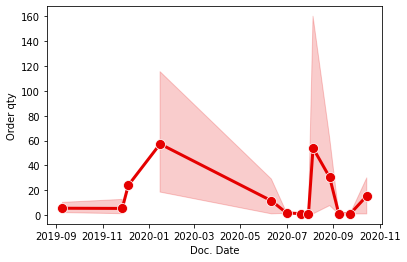

In [403]:
 x = vendas['Doc. Date'].loc[vendas['Ship-to nu'] == 29983887 ]  # apenas as datas em que o cliente fez pedidos, ao invés dos 541 dias
 y = vendas['Order qty'].loc[vendas['Ship-to nu'] == 29983887 ]  # pegar a quantidade de ordens que o cliente fez naquela data e somar
 sns.lineplot(x=x, y=y, lw=3, color='xkcd:red', marker='o', markersize=10)

In [404]:
y

69554     2.0
69555     2.0
69556     2.0
69557     3.0
69558     2.0
         ... 
73489     1.0
73490     1.0
73491     1.0
73492    12.0
73550    24.0
Name: Order qty, Length: 118, dtype: float64

In [ ]:
cumulativo = []

for i in range(len(vendas.Brand.value_counts().index)):
    cumulativo.append(vendas.Brand.value_counts()[i] / 28316)
    
for i in range(1, len(vendas.Brand.value_counts().index)):
    cumulativo[i] += cumulativo[i - 1]
    
cumulativo

### 151° cliente: 29379916
**113 pedidos, ou 0.15% do total**

In [ ]:
vendas['Ship-to nu'].value_counts()[150:151]

29379916    113
Name: Ship-to nu, dtype: int64

In [ ]:
vendas.loc[vendas['Ship-to nu'] == 29379916]

,Unnamed: 0,Doc. Date,Material,Order qty,Ship-to nu,PCS delivered,HL delivered,delivery_days,delivery_flag,lead_time_creation_vs_rdd_flag,MACO/HL,Groupement,Postal Code,Street,Sous groupement,M2_Territory_ID,M1_Territory_ID,Dépt,Brand,Subrand,SEGMENTS : Pils / Spécialités / Superspécialités/Bouteille Young adult,Container Type,Container Size,Variétés,Segment LE,Latitude,Longitude,Degre Alc,TTC,Brut + TE,Net + TE - Hors majoration de rompu de palette,DA
5672,5672,2020-07-16,3337,1.0,29379916,60.0,4.752,11,0,1,171.614575,FRANCE BOISSONS,62100,"9001 RUE DES GARENNES,ZI DES DUNES",France BOISSONS,FR01_ON_2000,FR01_ON_2005,62.0,LEFFE,LEFFE BLONDE,Spécialités,BOTTLE VC,"0,330 L",Blonde,PREMIUM,50.9581,1.8521,6.6,23.950656,20.640,19.958880,0.0
5673,5673,2020-07-16,5983,24.0,29379916,24.0,7.200,11,0,1,133.670982,FRANCE BOISSONS,62100,"9001 RUE DES GARENNES,ZI DES DUNES",France BOISSONS,FR01_ON_2000,FR01_ON_2005,62.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,50.9581,1.8521,5.7,81.119556,68.490,67.599630,0.0
5674,5674,2020-07-16,3410,48.0,29379916,48.0,14.400,11,0,1,170.305026,FRANCE BOISSONS,62100,"9001 RUE DES GARENNES,ZI DES DUNES",France BOISSONS,FR01_ON_2000,FR01_ON_2005,62.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,50.9581,1.8521,6.6,94.862700,81.750,79.052250,0.0
5675,5675,2020-07-16,3372,48.0,29379916,48.0,14.400,11,0,1,87.899004,FRANCE BOISSONS,62100,"9001 RUE DES GARENNES,ZI DES DUNES",France BOISSONS,FR01_ON_2000,FR01_ON_2005,62.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,50.9581,1.8521,5.2,56.922264,48.060,47.435220,0.0
5676,5676,2020-07-16,11574,24.0,29379916,24.0,7.200,11,0,1,85.212929,FRANCE BOISSONS,62100,"9001 RUE DES GARENNES,ZI DES DUNES",France BOISSONS,FR01_ON_2000,FR01_ON_2005,62.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,50.9581,1.8521,4.8,58.876524,49.710,49.063770,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60802,60802,2019-10-31,11574,2.0,29379916,16.0,4.800,12,1,1,85.212929,FRANCE BOISSONS,62100,"9001 RUE DES GARENNES,ZI DES DUNES",France BOISSONS,FR01_ON_2000,FR01_ON_2005,62.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,50.9581,1.8521,4.8,58.876524,49.710,49.063770,0.0
60803,60803,2019-10-31,59874,2.0,29379916,120.0,9.504,12,1,1,186.904201,FRANCE BOISSONS,62100,"9001 RUE DES GARENNES,ZI DES DUNES",France BOISSONS,FR01_ON_2000,FR01_ON_2005,62.0,TRIPLE KARMELIET,TRIPLE KARMELIET,Craft,BOTTLE VC,"0,330 L",-,SUPER PREMIUM,50.9581,1.8521,8.4,28.454400,23.712,23.712000,0.0
60804,60804,2019-10-31,16550,5.0,29379916,250.0,22.500,12,1,1,25.345586,FRANCE BOISSONS,62100,"9001 RUE DES GARENNES,ZI DES DUNES",France BOISSONS,FR01_ON_2000,FR01_ON_2005,62.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,50.9581,1.8521,3.8,6.408000,5.340,5.340000,0.0
60805,60805,2019-10-31,59848,9.0,29379916,54.0,16.200,12,1,1,180.045916,FRANCE BOISSONS,62100,"9001 RUE DES GARENNES,ZI DES DUNES",France BOISSONS,FR01_ON_2000,FR01_ON_2005,62.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,50.9581,1.8521,8.0,97.704000,81.420,81.420000,0.0


In [ ]:
vendas['Brand'].loc[vendas['Ship-to nu'] == 29379916 ].value_counts()

LEFFE               17
TRIPLE KARMELIET    12
Name: Brand, dtype: int64

In [ ]:
vendas['Container Size'].loc[vendas['Ship-to nu'] == 29379916 ].value_counts()

0,330 L    26
6,000 L     3
Name: Container Size, dtype: int64

In [ ]:
vendas['Order qty'].loc[vendas['Ship-to nu'] == 29379916 ].value_counts().head()
vendas['Order qty'].loc[vendas['Ship-to nu'] == 29379916 ].sum()

625.0

In [ ]:
vendas['PCS delivered'].loc[vendas['Ship-to nu'] == 29379916 ].value_counts().head()
vendas['PCS delivered'].loc[vendas['Ship-to nu'] == 29379916 ].sum()

8728.0

In [ ]:
vendas['Doc. Date'].loc[vendas['Ship-to nu'] == 29379916 ].value_counts() #15
''' O cliente 29379916  fez seus 113 pedidos em 15 ocasiões, uma média de ????? e de 7.53 pedidos por ocasião.'''

' O cliente 29379916  fez seus 113 pedidos em 15 ocasiões, uma média de ????? e de 7.53 pedidos por ocasião.'

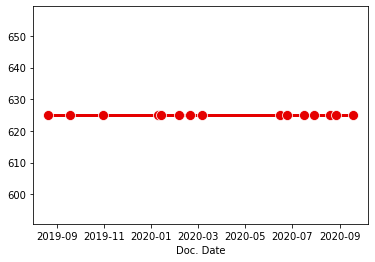

In [399]:
 x = vendas['Doc. Date'].loc[vendas['Ship-to nu'] == 29379916 ]  # apenas as datas em que o cliente fez pedidos, ao invés dos 541 dias
 y = vendas['Order qty'].loc[vendas['Ship-to nu'] == 29379916 ].sum()  # pegar a quantidade de ordens que o cliente fez naquela data e somar
 sns.lineplot(x=x, y=y, lw=3, color='xkcd:red', marker='o', markersize=10)